# Signatures_Paper.ipynb

This notebook shows how to create the figures in 

**Understanding the effects of spacecraft trajectories through solar coronal mass ejection flux ropes using 3DCOREweb**

Hannah T. Rüdisser<sup>1,2</sup>, Andreas J. Weiss<sup>3</sup>, Justin Le Louëdec<sup>1</sup>, Ute V. Amerstorfer<sup>1</sup>, Christian Möstl<sup>1</sup>, Emma E. Davies<sup>1</sup>, and Helmut Lammer<sup>4</sup>

<sup>1</sup> Austrian Space Weather Office, GeoSphere Austria, Graz, Austria <br>
<sup>2</sup> Institute of Physics, University of Graz, Graz, Austria<br>
<sup>3</sup> NASA Postdoctoral Program Fellow, NASA Goddard Space Flight Center, Greenbelt, MD, USA<br>
<sup>4</sup> Space Research Institute, Austrian Academy of Sciences, Graz, Austria<br>
<br>
<br> 

**1. Import packages**<br> 
**2. Import and process data**<br> 
**3. Create 3D plots (shape with fieldlines)**<br> 
**4. Create 3D plots (spacecraft setup)**<br> 
**5. Create in situ plots**

## 1. Import packages

The necessary packages are imported.

In [1]:
import coreweb
from coreweb.methods.offwebutils import get_modelkwargs_ranges, offwebfit, get_eventinfo, update_posfig_offweb, create_movie, ropechecker, signaturecheck, signaturecheckfull
from coreweb.dashcore.utils.plotting import check_animation, check_fittingpoints, get_longmove_array
from coreweb.dashcore.utils.utils import load_fit, cart2sphere, sphere2cart, round_to_hour_or_half, get_iparams_live, process_coordinates
from coreweb.dashcore.assets.config_sliders import modelslidervars, magslidervars
from coreweb.dashcore.app import update_launch_label, generate_graphstore
from coreweb.dashcore.pages.Start import update_alert_for_init

import coreweb.dashcore.utils.heliocats as hc

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly_express as px
import plotly.figure_factory as ff
from plotly.validators.scatter.marker import SymbolValidator
import plotly.io as pio

pio.renderers.default = "png"

import pandas as pd
from IPython.display import display, HTML

import os

import datetime
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## 2. Import and process data

The data for the synthetic spacecraft is generated and preprocessed.

In [2]:
reference_frame = "RTN"
idd = 'ICME_SYN_CUSTOM'


eventinfo = get_eventinfo(idd, purelysyn=True)
graphstore, posstore, _ = generate_graphstore(eventinfo, reference_frame, {})

spacecraftoptions = None 
bodyoptions = ["Sun"]

firstfield = 50.
secondfield = 5.
nameadd = ''

view_legend_insitu = True
insitu = False
positions = True
plottheme = 'light-simple'
currenttimeslider = 55
launchlabel = None
rinput = 0.8
lonput = 0
latput = 0

deltatime = 100
longmove =  0 

longmove_array = get_longmove_array(longmove, rinput,lonput,latput, graphstore)

Data loaded from /Users/hannahruedisser/3DCOREweb/src/coreweb/dashcore/data/ICME_SYN_CUSTOM.pkl


## 3. Create 3D plots (shape with fieldlines)

3D plots showing the shape of the CME are generated according to the model parameters defined. The fieldlines for two different twist factors are shown inside of the CME.

Tracing Fieldlines
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
total turns estimates:  5.079705183439121 0.5602941538854768


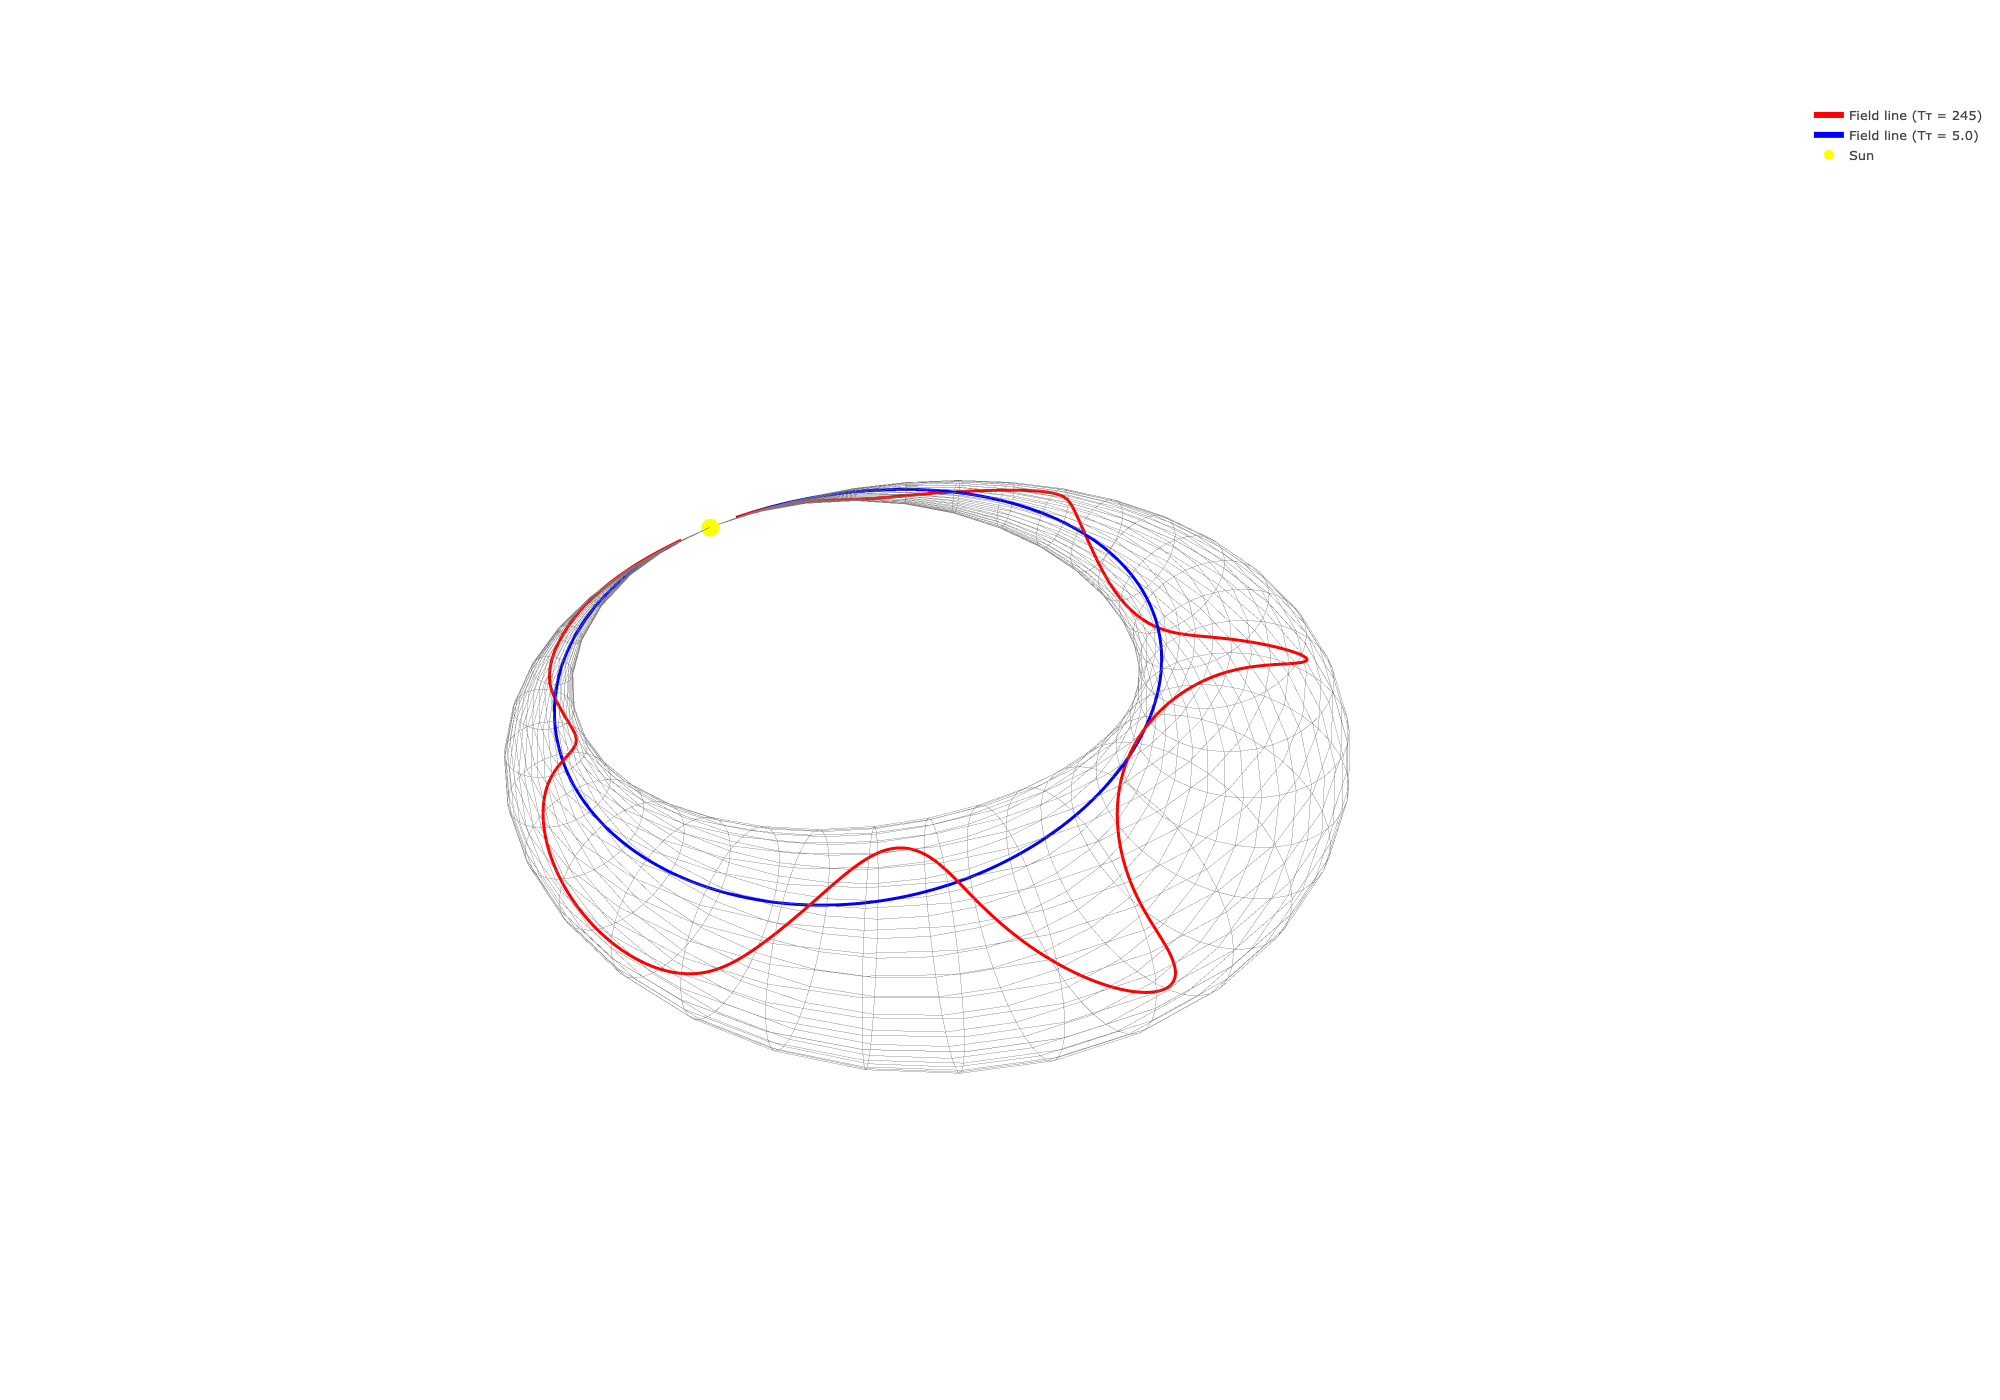

Tracing Fieldlines
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
total turns estimates:  5.079705183439121 0.5602941538854768


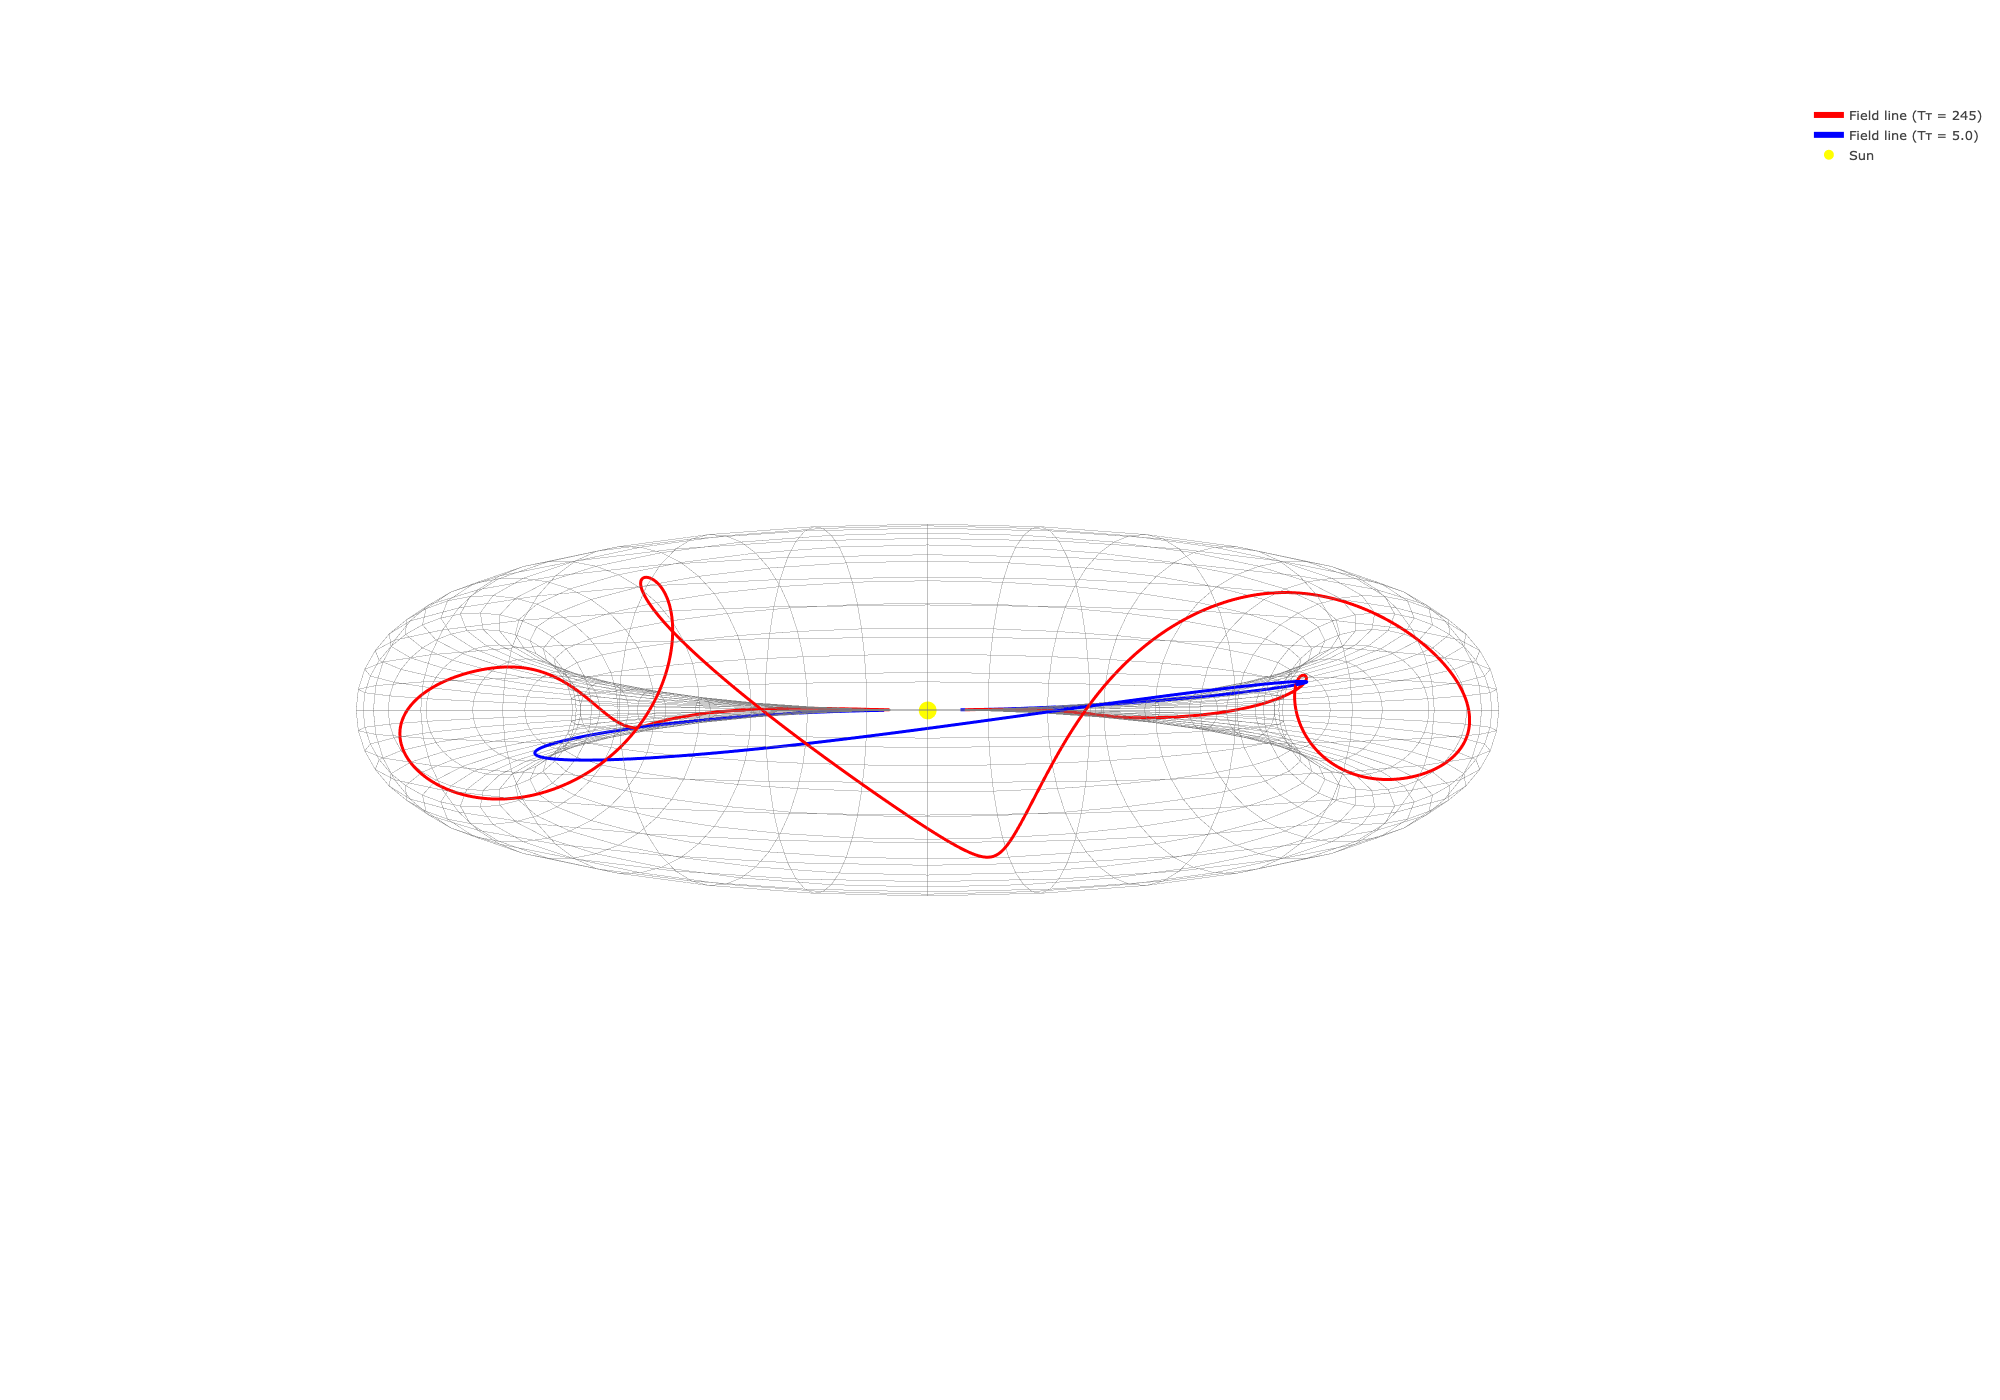

Tracing Fieldlines
Residuals are not finite in the initial point.
Residuals are not finite in the initial point.
total turns estimates:  5.079705183439121 0.5602941538854768


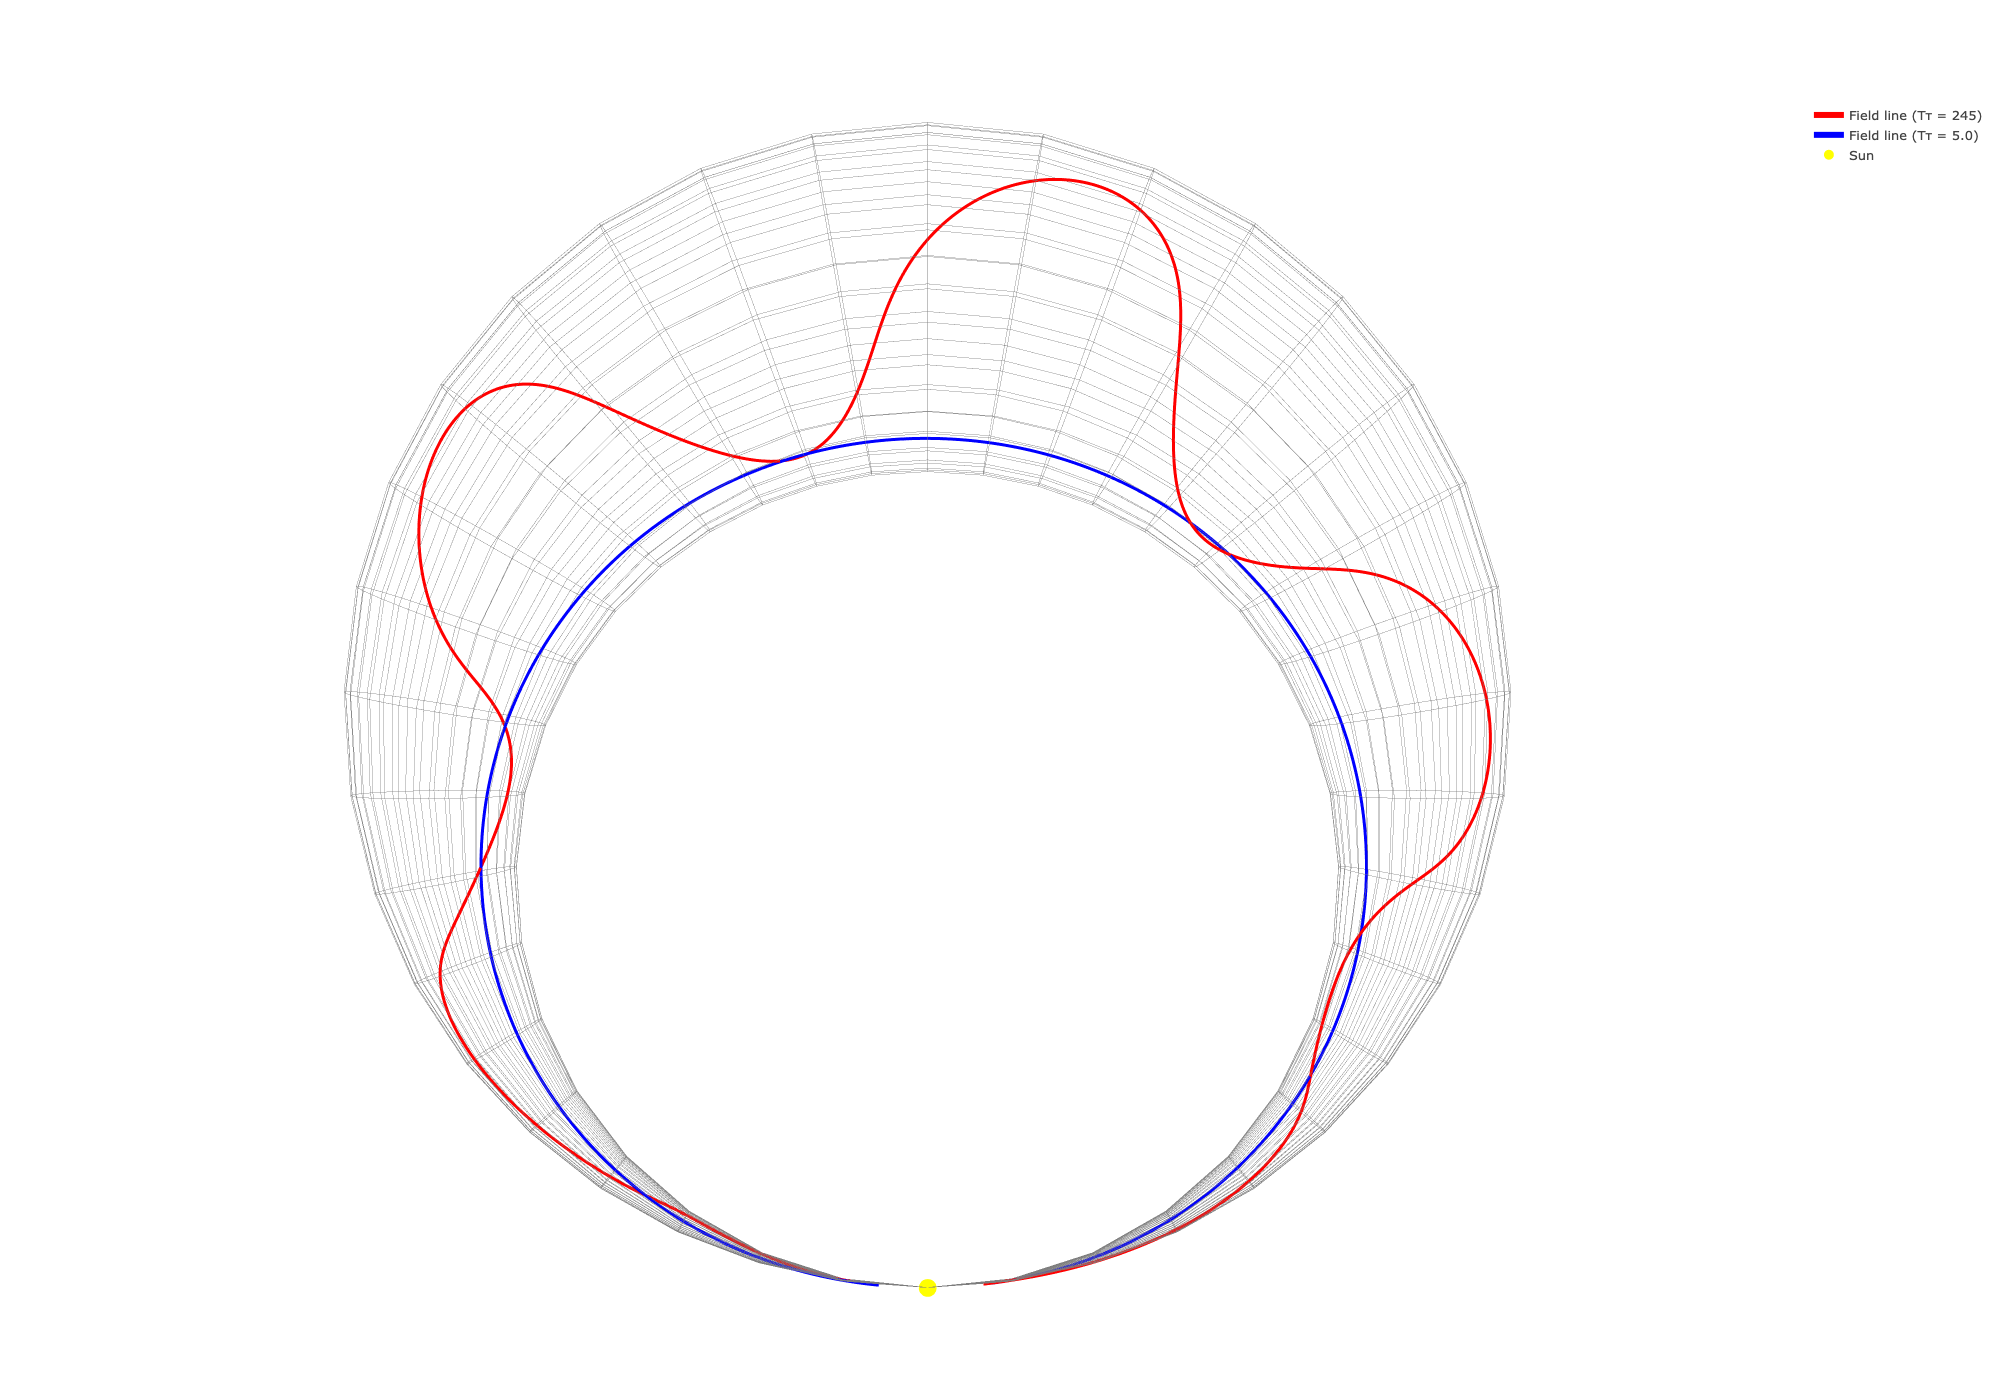

In [3]:
# quarter top
camera = [1,-0.78,1.1]
plot_options = ["Synthetic Event","dotted"]


modelstatevars1 = [0., # Longitude
                  0., # Latitude
                  0., # Inclination # high inclination: 90.
                  0.3, # Diameter 1 AU 
                  2., # Aspect Ratio
                  20., # Launch Radius
                  600., # Launch Velocity
                  1.14, # Expansion Rate
                  1.00, # Background Drag
                  500., # Background Velocity
                  firstfield, # T_Factor
                  1.64, # Magnetic Decay Rate
                  25., # Magnetic Field Strength 1 AU
                  ]

tracingfield1 = check_animation(None, 
                            None,
                            plottheme, 
                            graphstore, 
                            reference_frame, 
                            rinput, lonput, latput, 
                            currenttimeslider, 
                            eventinfo, launchlabel, plot_options, spacecraftoptions, bodyoptions,  insitu, positions, view_legend_insitu, camera, posstore, *modelstatevars1, addfield = True, secondfield=secondfield)

tracingfield1.write_image("quartertopdownfield.png", width = 1920 , height = 1920 , scale=4)
tracingfield1.show()

# front
camera = [1.3,0,0]
tracingfield1 = check_animation(None, 
                            None,
                            plottheme, 
                            graphstore, 
                            reference_frame, 
                            rinput, lonput, latput, 
                            currenttimeslider, 
                            eventinfo, launchlabel, plot_options, spacecraftoptions, bodyoptions,  insitu, positions, view_legend_insitu, camera, posstore, *modelstatevars1, addfield = True, secondfield=secondfield)

tracingfield1.write_image("frontfield.png", width = 1920 , height = 1920 , scale=4)
tracingfield1.show()

# top
camera = [0,0,1.2]

tracingfield1 = check_animation(None, 
                            None,
                            plottheme, 
                            graphstore, 
                            reference_frame, 
                            rinput, lonput, latput, 
                            currenttimeslider, 
                            eventinfo, launchlabel, plot_options, spacecraftoptions, bodyoptions,  insitu, positions, view_legend_insitu, camera, posstore, *modelstatevars1, addfield = True, secondfield=secondfield)


tracingfield1.write_image("topdownfield.png", width = 1920 , height = 1920 , scale=4)
tracingfield1.show()

## 4. Create 3D plots (spacecraft setup)

A 3D plot of the spacecraft setup around the CME in the inner heliosphere.

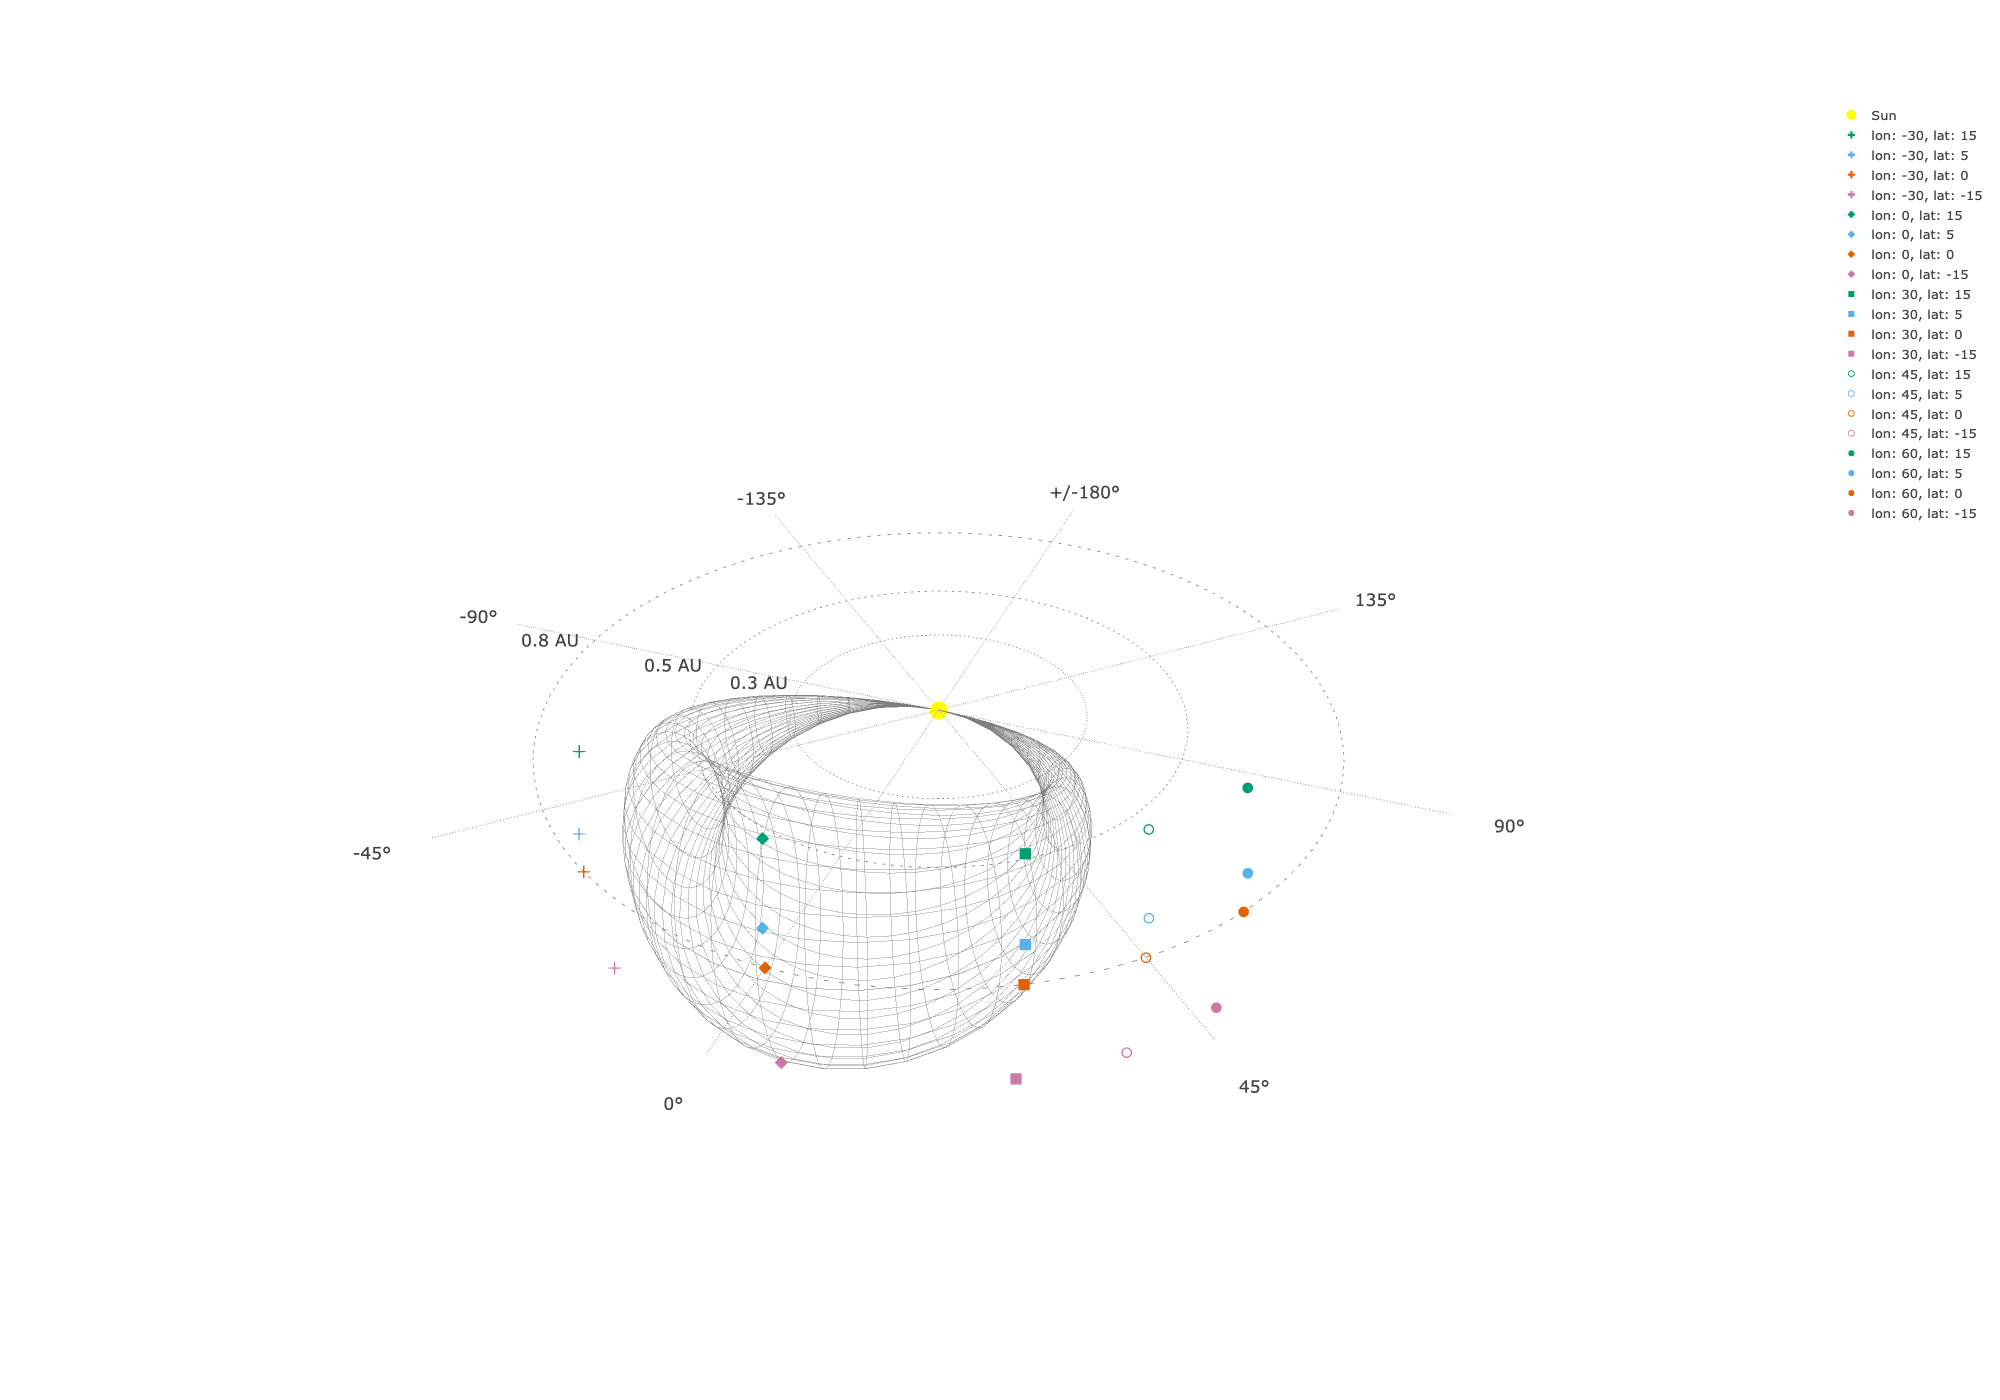

In [4]:
# Low Inc

plot_options = [
    "Longitudinal Grid",
    "AU axis",
    "Synthetic Event",
    "dotted", # if you want the grid to be dotted, use dashed or remove if not,
    "AU lines"
    ]

syncolors = [
    '#009e74',
    '#56b3e9',
    '#e66000',
    '#cc79a7',
]

synshapes = [
    'cross', 
    'diamond',
    'square', 
    'circle-open',
    'circle' 
]

# quarter top
camera = [1,0.37,0.7]

checkanim = check_animation(None, 
                            None,
                            plottheme, 
                            graphstore, 
                            reference_frame, 
                            rinput, lonput, latput, 
                            currenttimeslider, 
                            eventinfo, launchlabel, plot_options, spacecraftoptions, bodyoptions,  insitu, positions, True, camera.copy(), posstore, *modelstatevars1)

lons = [-30, 0 , 30, 45, 60] # high inclination: [-15, 0 , 5, 15]

lats = [15, 5, 0, -15] # high inclination: [45, 30, 0, -30]

namecount = 0

for j, lon in enumerate(lons):
    for k,lat in enumerate(lats):
        x,y,z = sphere2cart(float(rinput), np.deg2rad(-float(lat)+90), np.deg2rad(float(lon)))

        checkanim.add_trace(
            go.Scatter3d(
                x=[x], y=[y], z=[z],
                mode='markers', 
                marker=dict(size=6, 
                            symbol=synshapes[j],
                            color=syncolors[k]),
                name="lon: "+str(lon)+', lat: ' + str(lat),
                legendgroup = '1',
                showlegend=True,
            ), row=1, col=1)
        
        namecount += 1

checkanim.show()
checkanim.write_image("Figure3_quartertop.png", width = 1920 , height = 1920 , scale=3)
#checkanim.write_image("Figure3_quartertop.svg", width = 1920 , height = 1920 , scale=3)

## 5. Create in situ plots 

The synthetic in situ signatures are plotted for all spacecraft. This is repeated for all fluxrope types and two different twist factors.

righthanded: NES
{'ensemble_size': 1, 'iparams': {'cme_longitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_latitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_inclination': {'distribution': 'fixed', 'default_value': 180.0}, 'cme_diameter_1au': {'distribution': 'fixed', 'default_value': 0.3}, 'cme_aspect_ratio': {'distribution': 'fixed', 'default_value': 2.0}, 'cme_launch_radius': {'distribution': 'fixed', 'default_value': 20.0}, 'cme_launch_velocity': {'distribution': 'fixed', 'default_value': 600.0}, 't_factor': {'distribution': 'fixed', 'default_value': 50.0}, 'cme_expansion_rate': {'distribution': 'fixed', 'default_value': 1.14}, 'magnetic_decay_rate': {'distribution': 'fixed', 'default_value': 1.64}, 'magnetic_field_strength_1au': {'distribution': 'fixed', 'default_value': 25.0}, 'background_drag': {'distribution': 'fixed', 'default_value': 1.0}, 'background_velocity': {'distribution': 'fixed', 'default_value': 500.0}}}
SWN_low


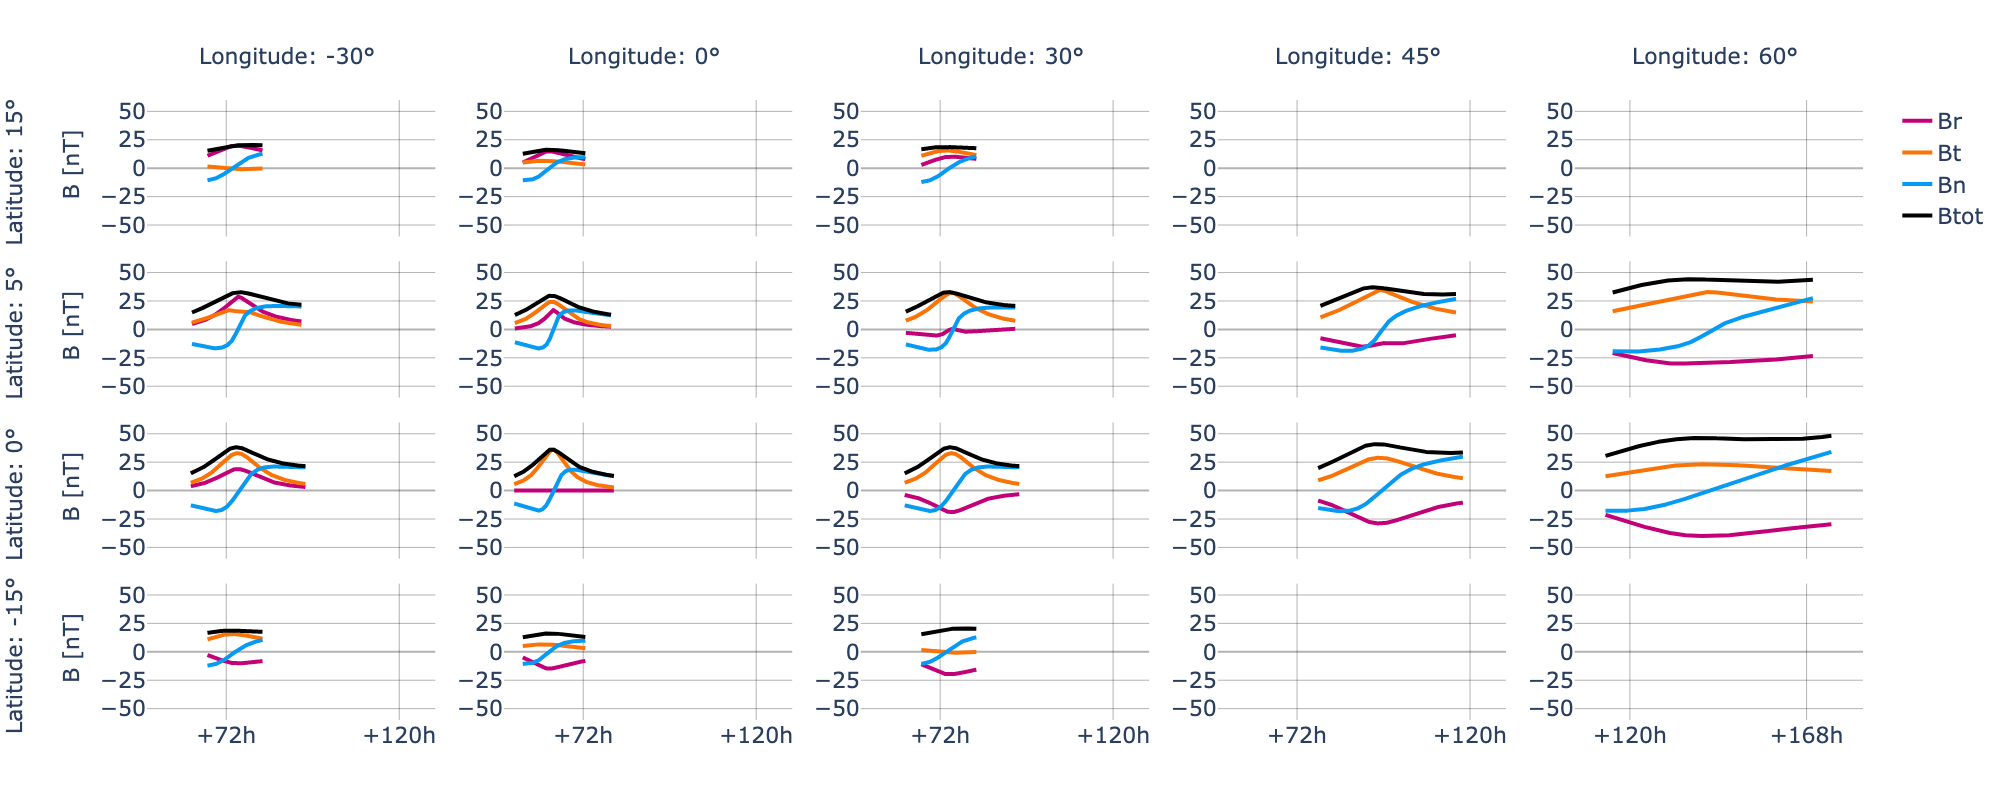

{'ensemble_size': 1, 'iparams': {'cme_longitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_latitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_inclination': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_diameter_1au': {'distribution': 'fixed', 'default_value': 0.3}, 'cme_aspect_ratio': {'distribution': 'fixed', 'default_value': 2.0}, 'cme_launch_radius': {'distribution': 'fixed', 'default_value': 20.0}, 'cme_launch_velocity': {'distribution': 'fixed', 'default_value': 600.0}, 't_factor': {'distribution': 'fixed', 'default_value': 50.0}, 'cme_expansion_rate': {'distribution': 'fixed', 'default_value': 1.14}, 'magnetic_decay_rate': {'distribution': 'fixed', 'default_value': 1.64}, 'magnetic_field_strength_1au': {'distribution': 'fixed', 'default_value': 25.0}, 'background_drag': {'distribution': 'fixed', 'default_value': 1.0}, 'background_velocity': {'distribution': 'fixed', 'default_value': 500.0}}}
NES_low


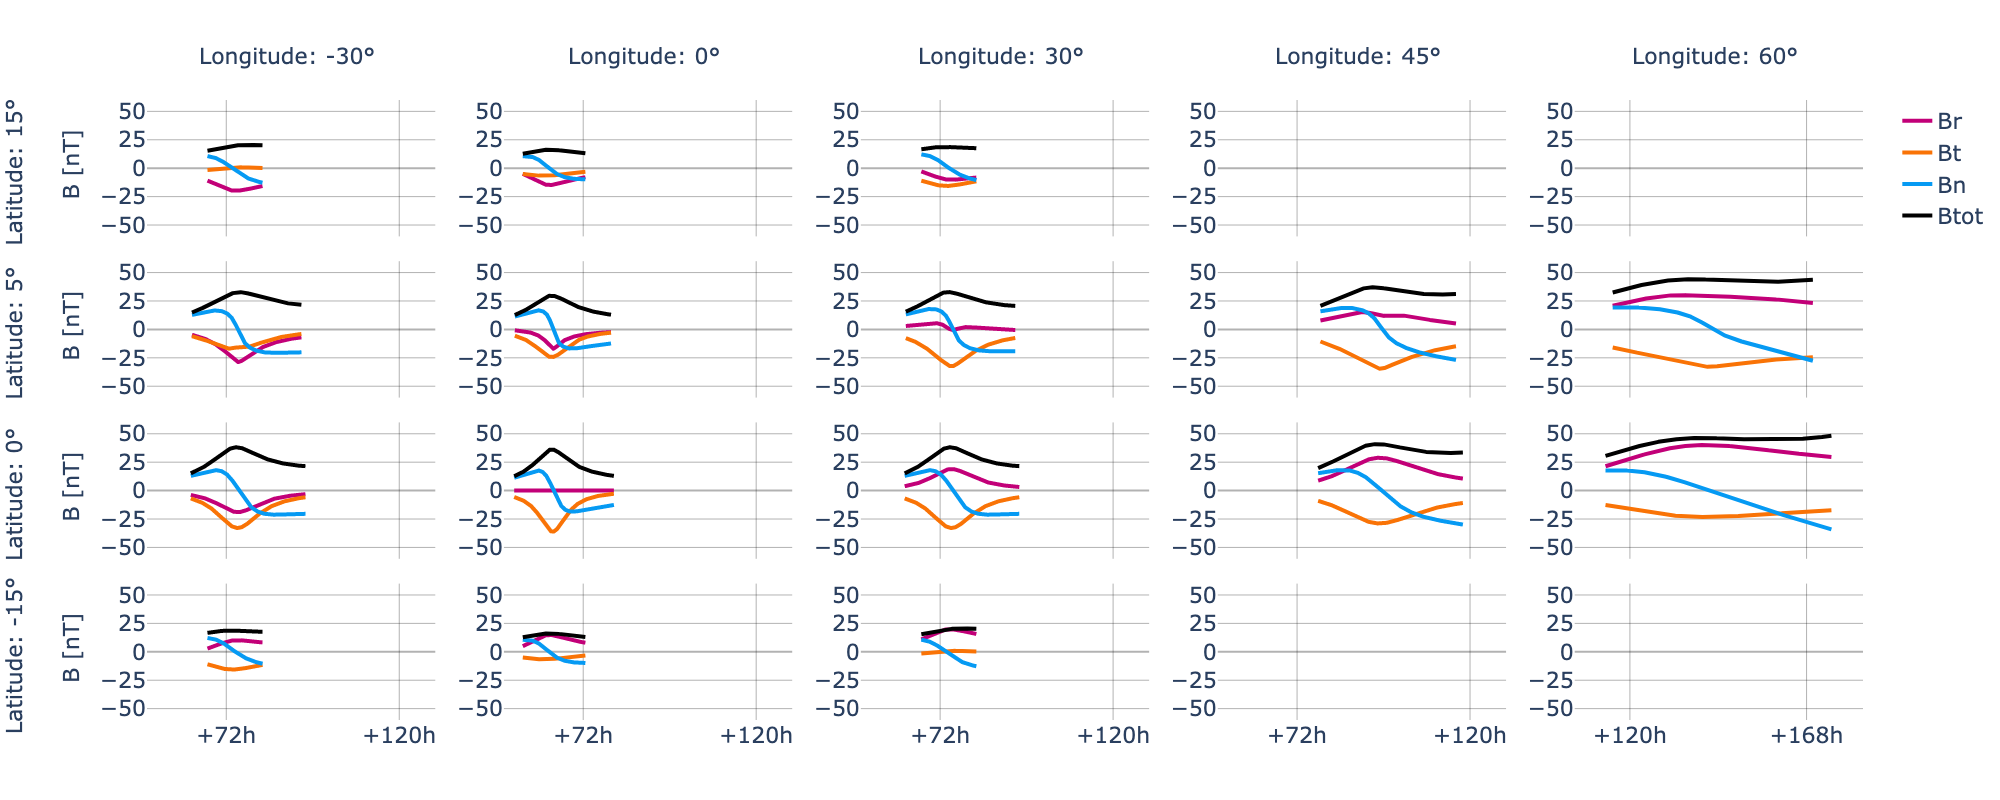

{'ensemble_size': 1, 'iparams': {'cme_longitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_latitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_inclination': {'distribution': 'fixed', 'default_value': 180.0}, 'cme_diameter_1au': {'distribution': 'fixed', 'default_value': 0.3}, 'cme_aspect_ratio': {'distribution': 'fixed', 'default_value': 2.0}, 'cme_launch_radius': {'distribution': 'fixed', 'default_value': 20.0}, 'cme_launch_velocity': {'distribution': 'fixed', 'default_value': 600.0}, 't_factor': {'distribution': 'fixed', 'default_value': -50.0}, 'cme_expansion_rate': {'distribution': 'fixed', 'default_value': 1.14}, 'magnetic_decay_rate': {'distribution': 'fixed', 'default_value': 1.64}, 'magnetic_field_strength_1au': {'distribution': 'fixed', 'default_value': 25.0}, 'background_drag': {'distribution': 'fixed', 'default_value': 1.0}, 'background_velocity': {'distribution': 'fixed', 'default_value': 500.0}}}
NWS_low


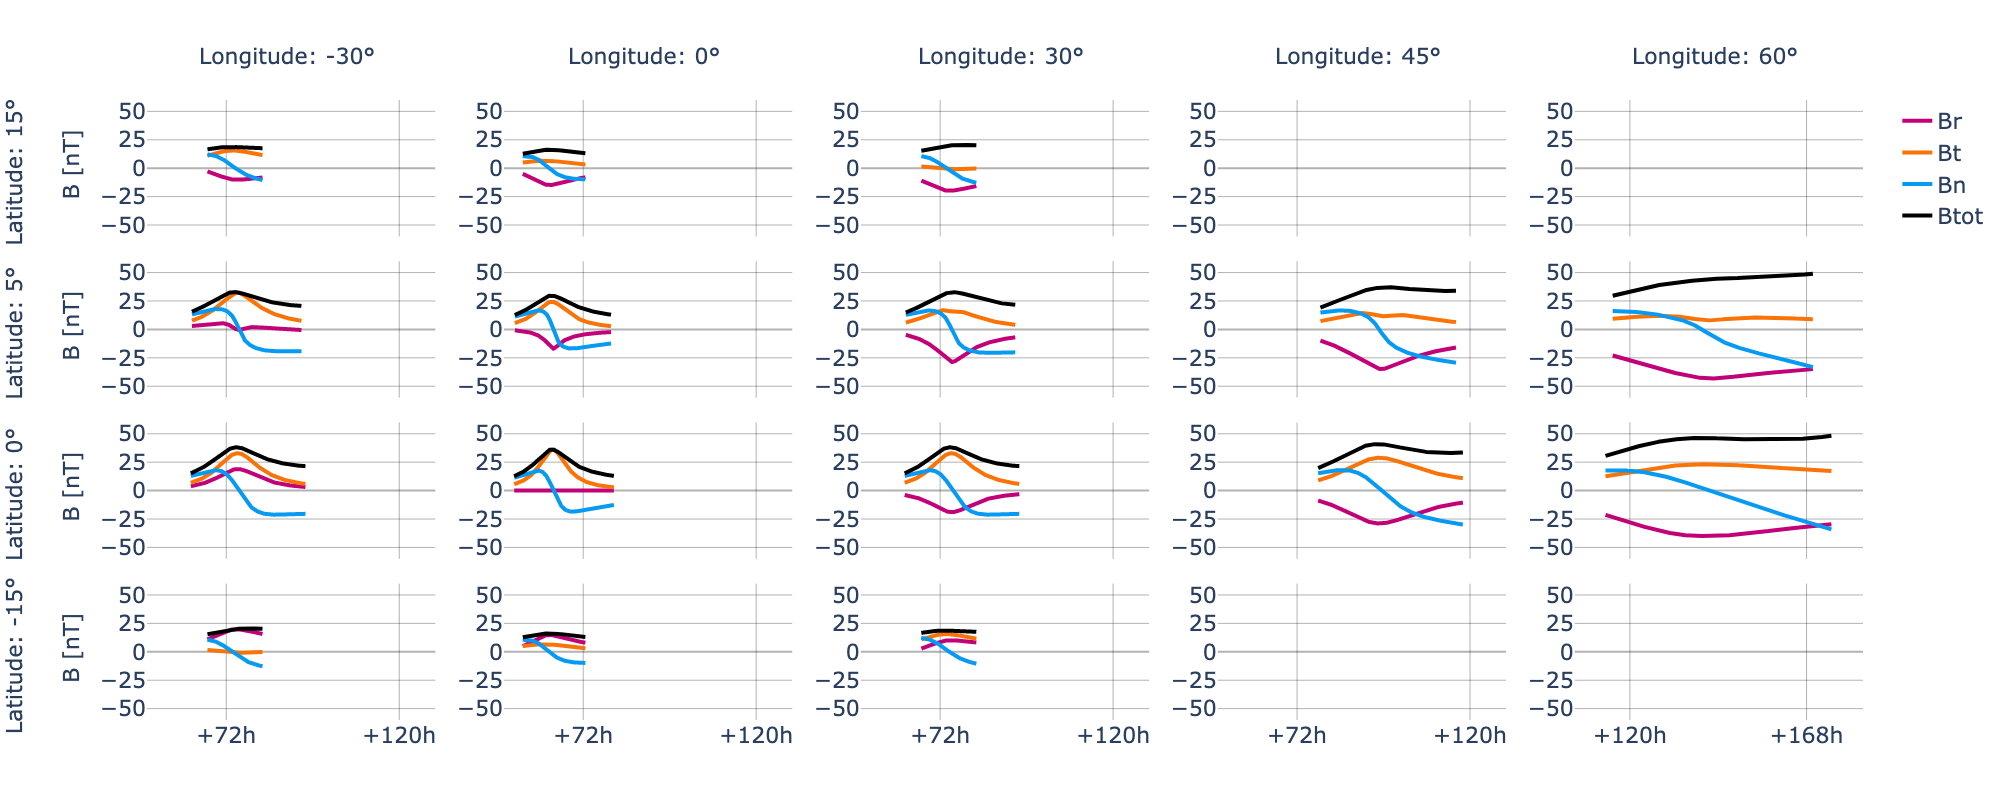

{'ensemble_size': 1, 'iparams': {'cme_longitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_latitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_inclination': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_diameter_1au': {'distribution': 'fixed', 'default_value': 0.3}, 'cme_aspect_ratio': {'distribution': 'fixed', 'default_value': 2.0}, 'cme_launch_radius': {'distribution': 'fixed', 'default_value': 20.0}, 'cme_launch_velocity': {'distribution': 'fixed', 'default_value': 600.0}, 't_factor': {'distribution': 'fixed', 'default_value': -50.0}, 'cme_expansion_rate': {'distribution': 'fixed', 'default_value': 1.14}, 'magnetic_decay_rate': {'distribution': 'fixed', 'default_value': 1.64}, 'magnetic_field_strength_1au': {'distribution': 'fixed', 'default_value': 25.0}, 'background_drag': {'distribution': 'fixed', 'default_value': 1.0}, 'background_velocity': {'distribution': 'fixed', 'default_value': 500.0}}}
SEN_low


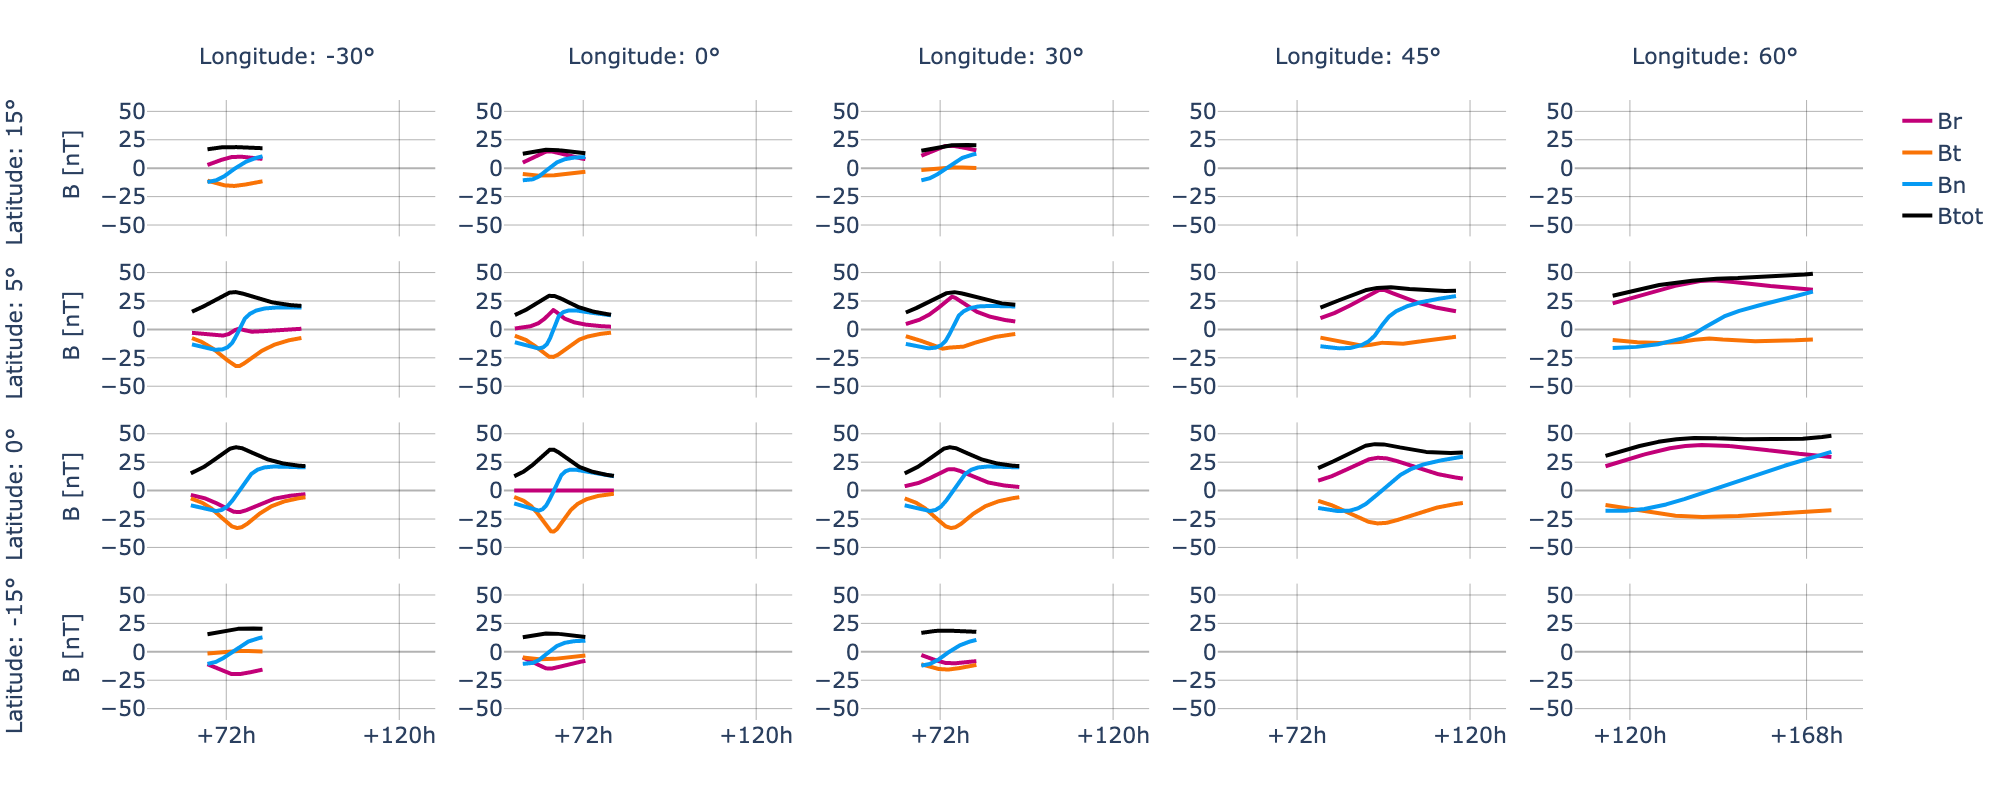

High Inclination!
righthanded: ENW
{'ensemble_size': 1, 'iparams': {'cme_longitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_latitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_inclination': {'distribution': 'fixed', 'default_value': 270.0}, 'cme_diameter_1au': {'distribution': 'fixed', 'default_value': 0.3}, 'cme_aspect_ratio': {'distribution': 'fixed', 'default_value': 2.0}, 'cme_launch_radius': {'distribution': 'fixed', 'default_value': 20.0}, 'cme_launch_velocity': {'distribution': 'fixed', 'default_value': 600.0}, 't_factor': {'distribution': 'fixed', 'default_value': 5.0}, 'cme_expansion_rate': {'distribution': 'fixed', 'default_value': 1.14}, 'magnetic_decay_rate': {'distribution': 'fixed', 'default_value': 1.64}, 'magnetic_field_strength_1au': {'distribution': 'fixed', 'default_value': 25.0}, 'background_drag': {'distribution': 'fixed', 'default_value': 1.0}, 'background_velocity': {'distribution': 'fixed', 'default_value': 500.0}}}
WNE_high


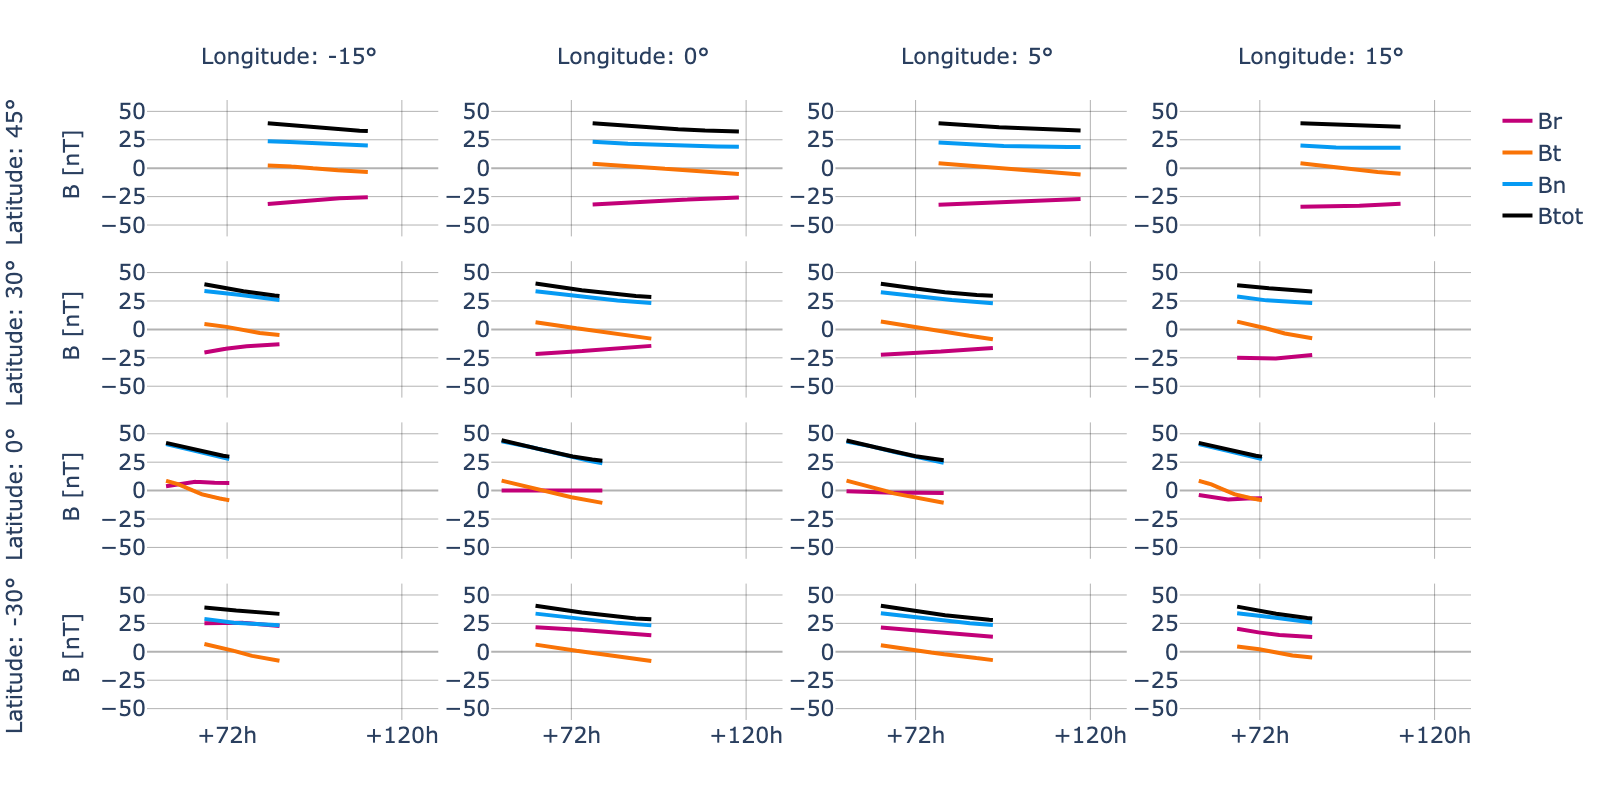

{'ensemble_size': 1, 'iparams': {'cme_longitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_latitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_inclination': {'distribution': 'fixed', 'default_value': 90.0}, 'cme_diameter_1au': {'distribution': 'fixed', 'default_value': 0.3}, 'cme_aspect_ratio': {'distribution': 'fixed', 'default_value': 2.0}, 'cme_launch_radius': {'distribution': 'fixed', 'default_value': 20.0}, 'cme_launch_velocity': {'distribution': 'fixed', 'default_value': 600.0}, 't_factor': {'distribution': 'fixed', 'default_value': 5.0}, 'cme_expansion_rate': {'distribution': 'fixed', 'default_value': 1.14}, 'magnetic_decay_rate': {'distribution': 'fixed', 'default_value': 1.64}, 'magnetic_field_strength_1au': {'distribution': 'fixed', 'default_value': 25.0}, 'background_drag': {'distribution': 'fixed', 'default_value': 1.0}, 'background_velocity': {'distribution': 'fixed', 'default_value': 500.0}}}
ESW_high


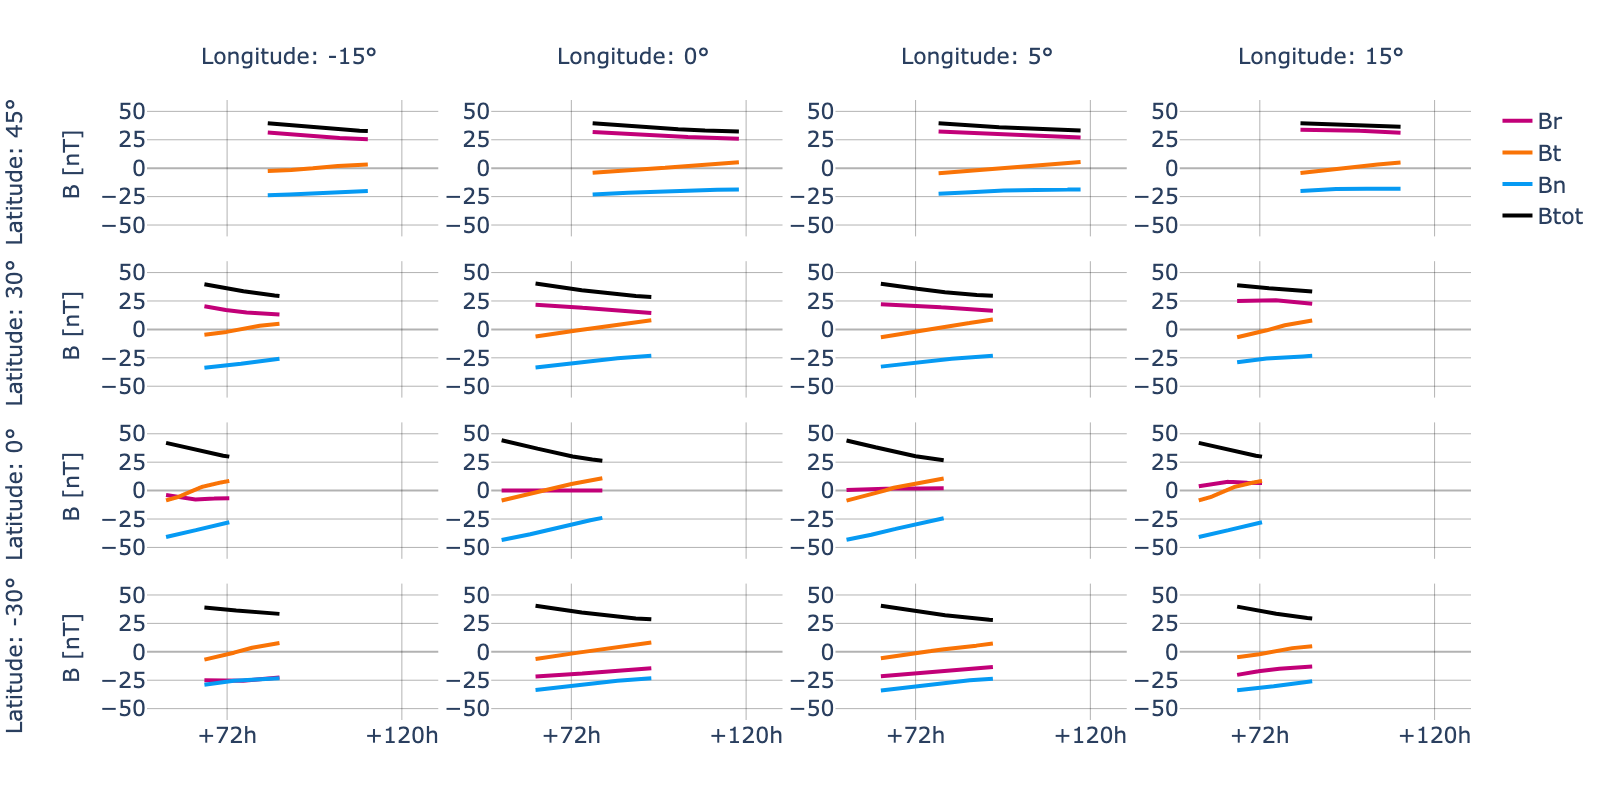

{'ensemble_size': 1, 'iparams': {'cme_longitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_latitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_inclination': {'distribution': 'fixed', 'default_value': 270.0}, 'cme_diameter_1au': {'distribution': 'fixed', 'default_value': 0.3}, 'cme_aspect_ratio': {'distribution': 'fixed', 'default_value': 2.0}, 'cme_launch_radius': {'distribution': 'fixed', 'default_value': 20.0}, 'cme_launch_velocity': {'distribution': 'fixed', 'default_value': 600.0}, 't_factor': {'distribution': 'fixed', 'default_value': -5.0}, 'cme_expansion_rate': {'distribution': 'fixed', 'default_value': 1.14}, 'magnetic_decay_rate': {'distribution': 'fixed', 'default_value': 1.64}, 'magnetic_field_strength_1au': {'distribution': 'fixed', 'default_value': 25.0}, 'background_drag': {'distribution': 'fixed', 'default_value': 1.0}, 'background_velocity': {'distribution': 'fixed', 'default_value': 500.0}}}
ENW_high


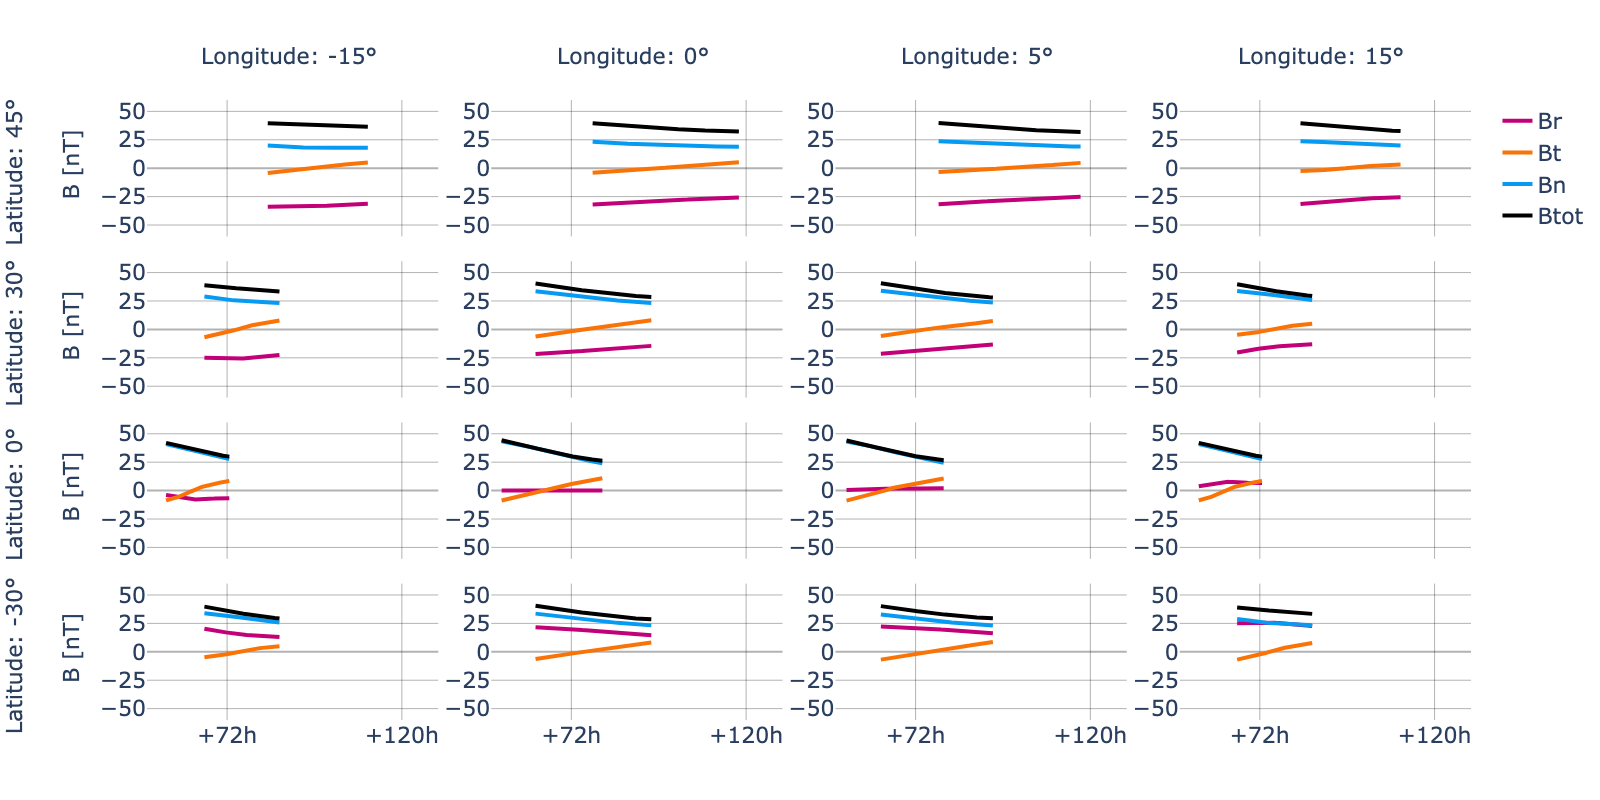

{'ensemble_size': 1, 'iparams': {'cme_longitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_latitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_inclination': {'distribution': 'fixed', 'default_value': 90.0}, 'cme_diameter_1au': {'distribution': 'fixed', 'default_value': 0.3}, 'cme_aspect_ratio': {'distribution': 'fixed', 'default_value': 2.0}, 'cme_launch_radius': {'distribution': 'fixed', 'default_value': 20.0}, 'cme_launch_velocity': {'distribution': 'fixed', 'default_value': 600.0}, 't_factor': {'distribution': 'fixed', 'default_value': -5.0}, 'cme_expansion_rate': {'distribution': 'fixed', 'default_value': 1.14}, 'magnetic_decay_rate': {'distribution': 'fixed', 'default_value': 1.64}, 'magnetic_field_strength_1au': {'distribution': 'fixed', 'default_value': 25.0}, 'background_drag': {'distribution': 'fixed', 'default_value': 1.0}, 'background_velocity': {'distribution': 'fixed', 'default_value': 500.0}}}
WSE_high


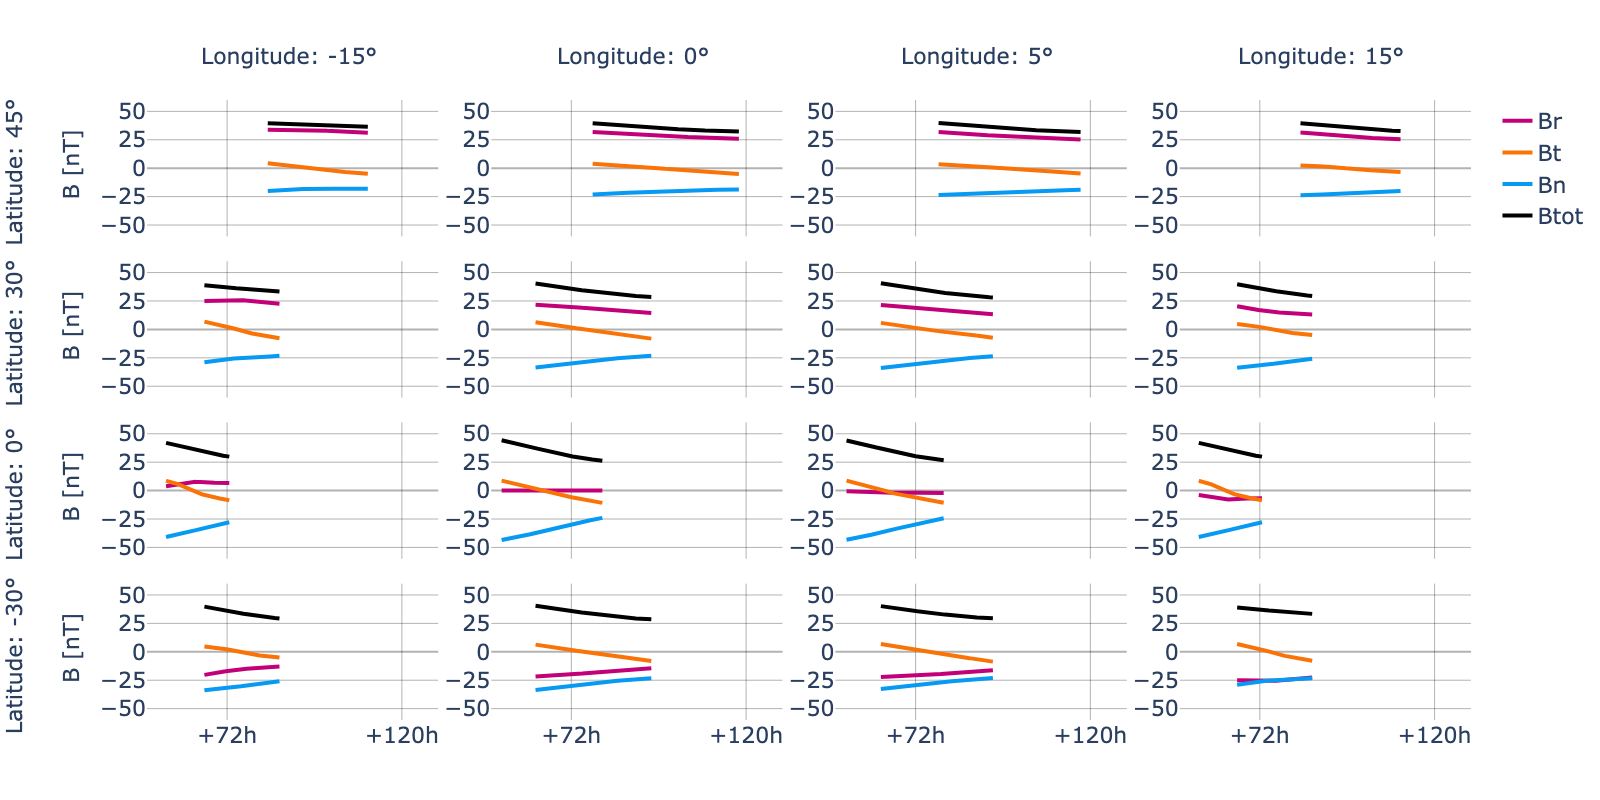

righthanded: NES
{'ensemble_size': 1, 'iparams': {'cme_longitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_latitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_inclination': {'distribution': 'fixed', 'default_value': 180.0}, 'cme_diameter_1au': {'distribution': 'fixed', 'default_value': 0.3}, 'cme_aspect_ratio': {'distribution': 'fixed', 'default_value': 2.0}, 'cme_launch_radius': {'distribution': 'fixed', 'default_value': 20.0}, 'cme_launch_velocity': {'distribution': 'fixed', 'default_value': 600.0}, 't_factor': {'distribution': 'fixed', 'default_value': 50.0}, 'cme_expansion_rate': {'distribution': 'fixed', 'default_value': 1.14}, 'magnetic_decay_rate': {'distribution': 'fixed', 'default_value': 1.64}, 'magnetic_field_strength_1au': {'distribution': 'fixed', 'default_value': 25.0}, 'background_drag': {'distribution': 'fixed', 'default_value': 1.0}, 'background_velocity': {'distribution': 'fixed', 'default_value': 500.0}}}
SWN_low


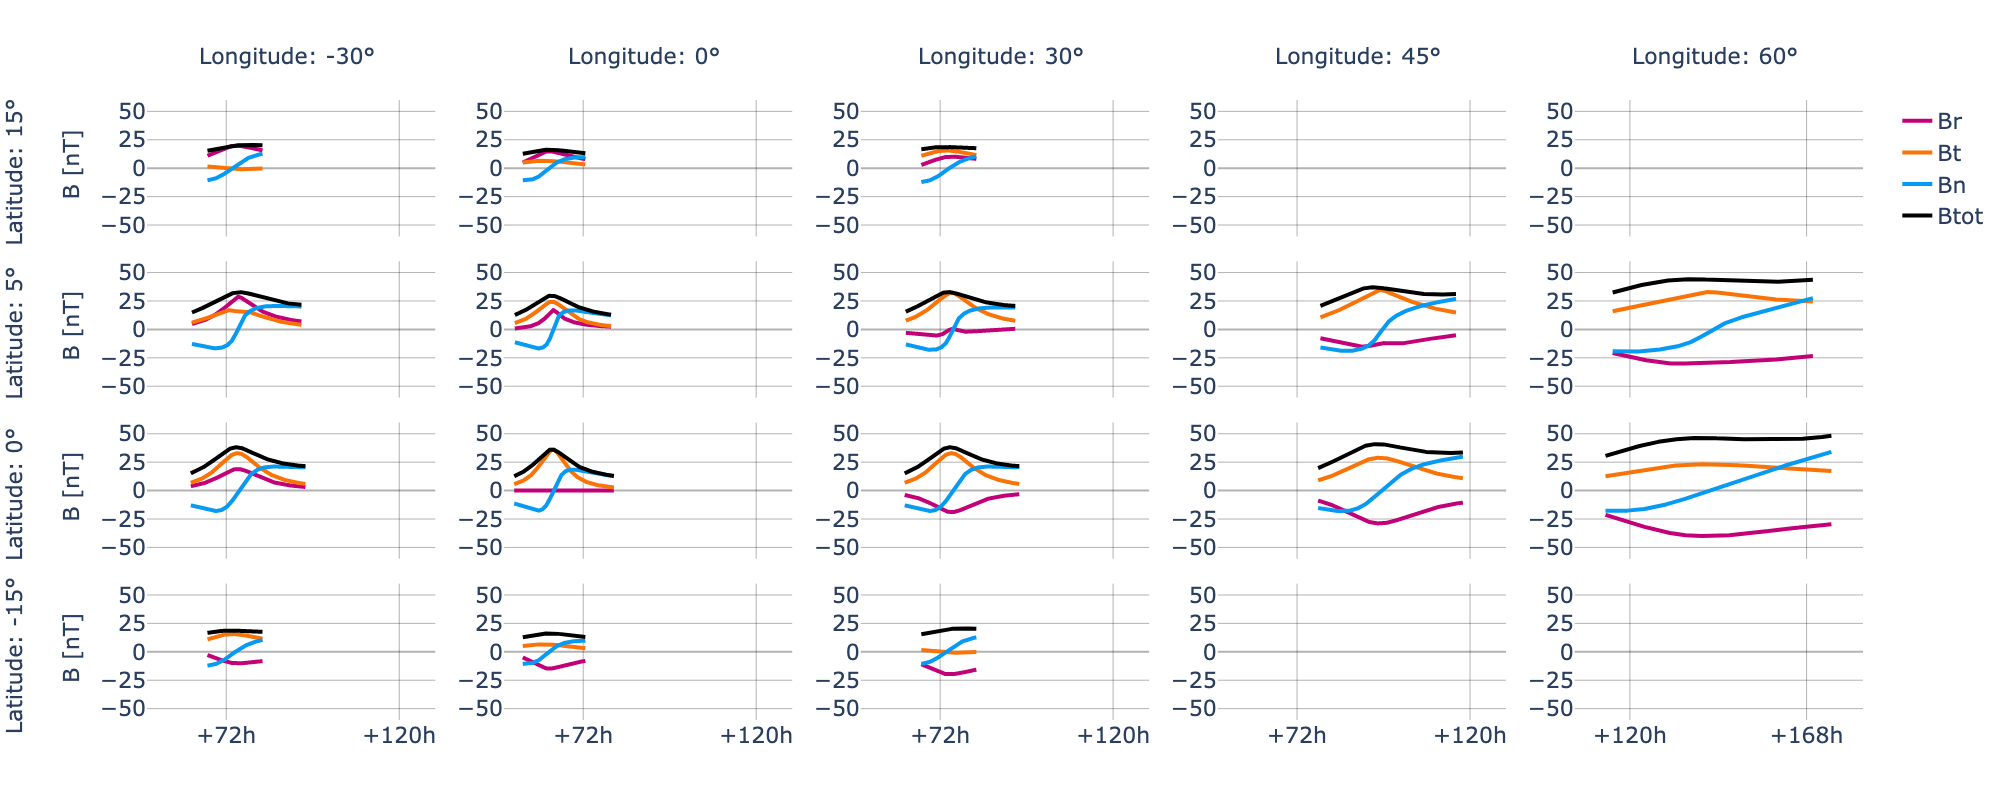

{'ensemble_size': 1, 'iparams': {'cme_longitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_latitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_inclination': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_diameter_1au': {'distribution': 'fixed', 'default_value': 0.3}, 'cme_aspect_ratio': {'distribution': 'fixed', 'default_value': 2.0}, 'cme_launch_radius': {'distribution': 'fixed', 'default_value': 20.0}, 'cme_launch_velocity': {'distribution': 'fixed', 'default_value': 600.0}, 't_factor': {'distribution': 'fixed', 'default_value': 50.0}, 'cme_expansion_rate': {'distribution': 'fixed', 'default_value': 1.14}, 'magnetic_decay_rate': {'distribution': 'fixed', 'default_value': 1.64}, 'magnetic_field_strength_1au': {'distribution': 'fixed', 'default_value': 25.0}, 'background_drag': {'distribution': 'fixed', 'default_value': 1.0}, 'background_velocity': {'distribution': 'fixed', 'default_value': 500.0}}}
NES_low


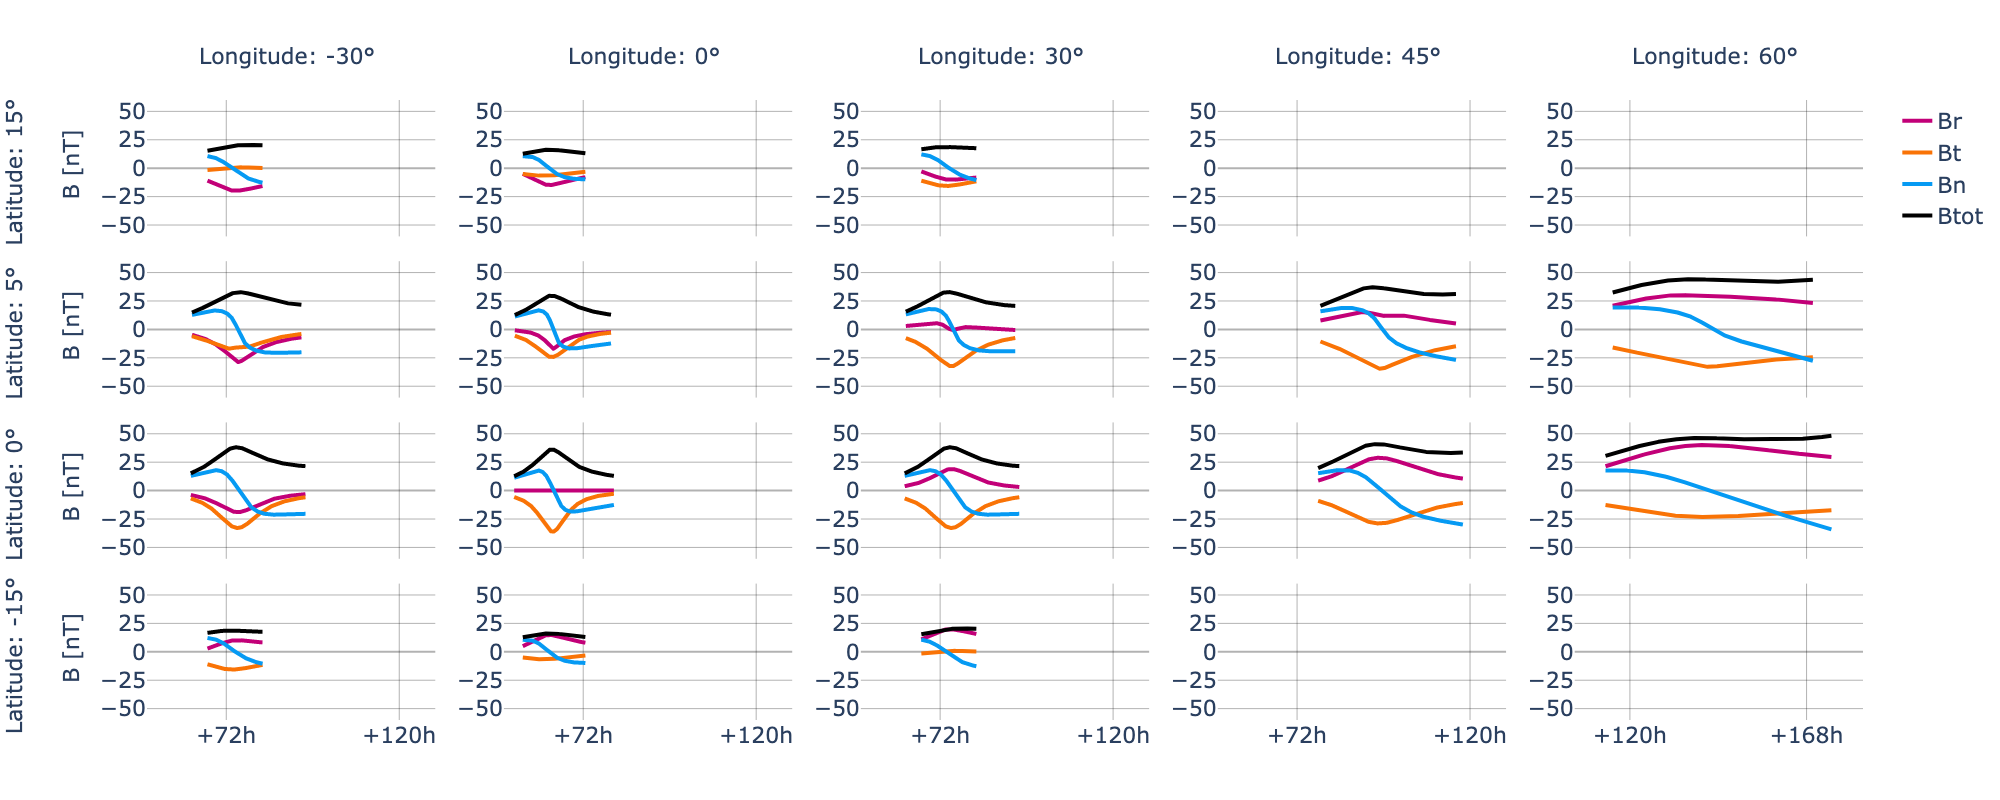

{'ensemble_size': 1, 'iparams': {'cme_longitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_latitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_inclination': {'distribution': 'fixed', 'default_value': 180.0}, 'cme_diameter_1au': {'distribution': 'fixed', 'default_value': 0.3}, 'cme_aspect_ratio': {'distribution': 'fixed', 'default_value': 2.0}, 'cme_launch_radius': {'distribution': 'fixed', 'default_value': 20.0}, 'cme_launch_velocity': {'distribution': 'fixed', 'default_value': 600.0}, 't_factor': {'distribution': 'fixed', 'default_value': -50.0}, 'cme_expansion_rate': {'distribution': 'fixed', 'default_value': 1.14}, 'magnetic_decay_rate': {'distribution': 'fixed', 'default_value': 1.64}, 'magnetic_field_strength_1au': {'distribution': 'fixed', 'default_value': 25.0}, 'background_drag': {'distribution': 'fixed', 'default_value': 1.0}, 'background_velocity': {'distribution': 'fixed', 'default_value': 500.0}}}
NWS_low


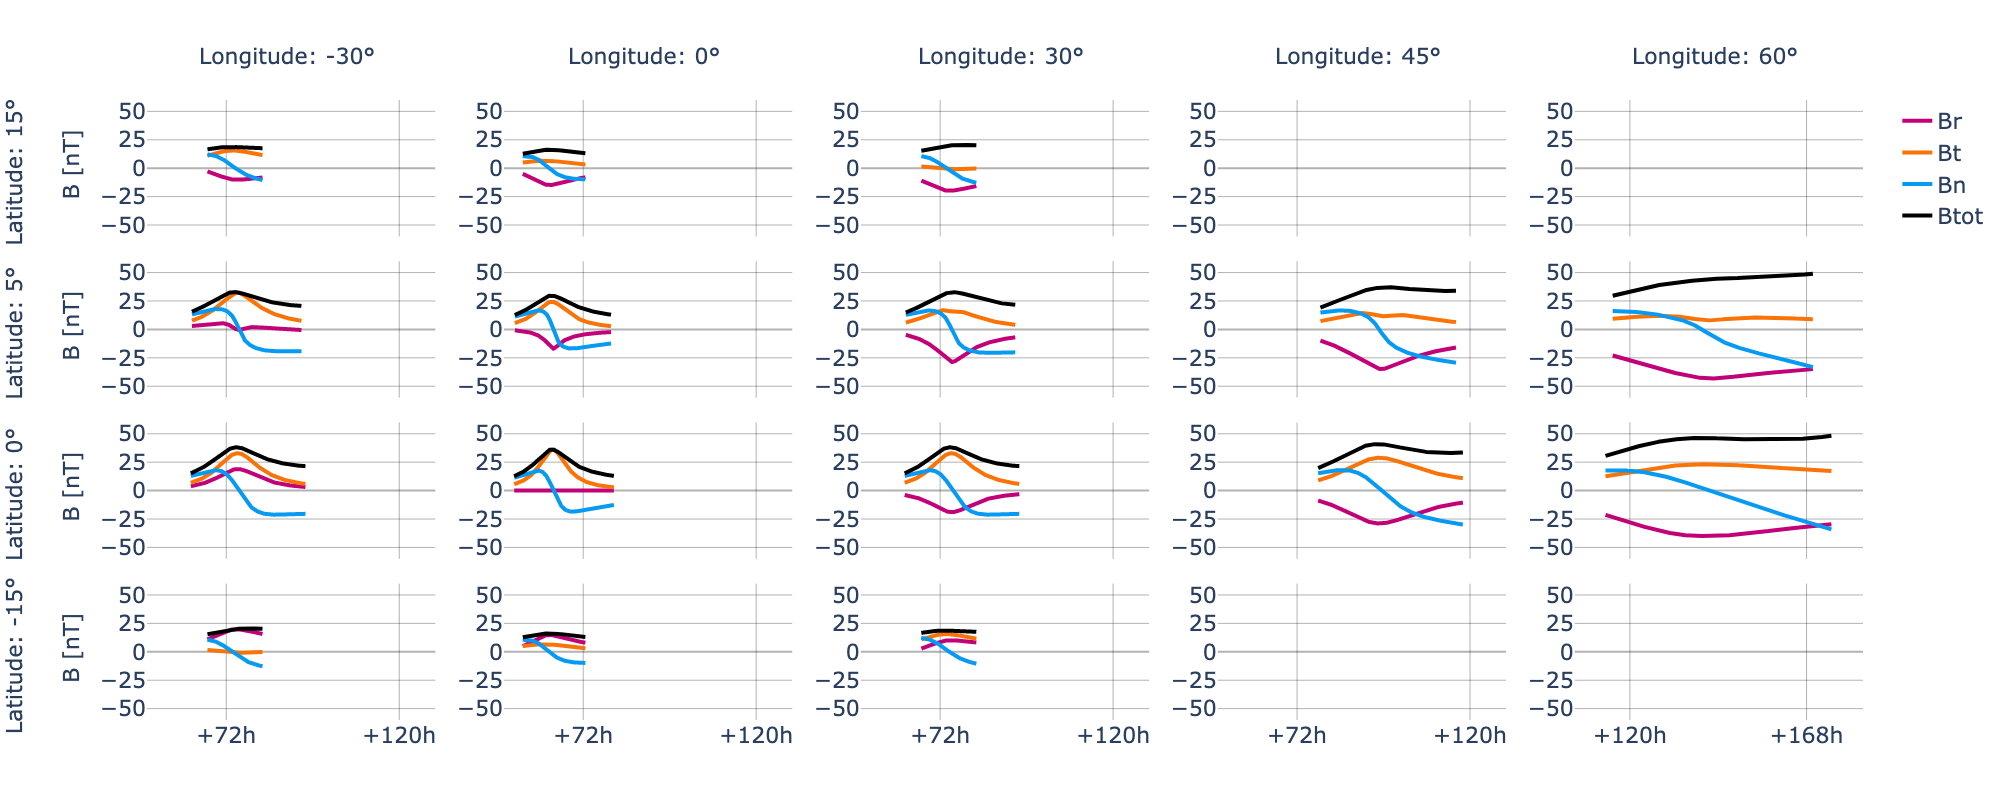

{'ensemble_size': 1, 'iparams': {'cme_longitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_latitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_inclination': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_diameter_1au': {'distribution': 'fixed', 'default_value': 0.3}, 'cme_aspect_ratio': {'distribution': 'fixed', 'default_value': 2.0}, 'cme_launch_radius': {'distribution': 'fixed', 'default_value': 20.0}, 'cme_launch_velocity': {'distribution': 'fixed', 'default_value': 600.0}, 't_factor': {'distribution': 'fixed', 'default_value': -50.0}, 'cme_expansion_rate': {'distribution': 'fixed', 'default_value': 1.14}, 'magnetic_decay_rate': {'distribution': 'fixed', 'default_value': 1.64}, 'magnetic_field_strength_1au': {'distribution': 'fixed', 'default_value': 25.0}, 'background_drag': {'distribution': 'fixed', 'default_value': 1.0}, 'background_velocity': {'distribution': 'fixed', 'default_value': 500.0}}}
SEN_low


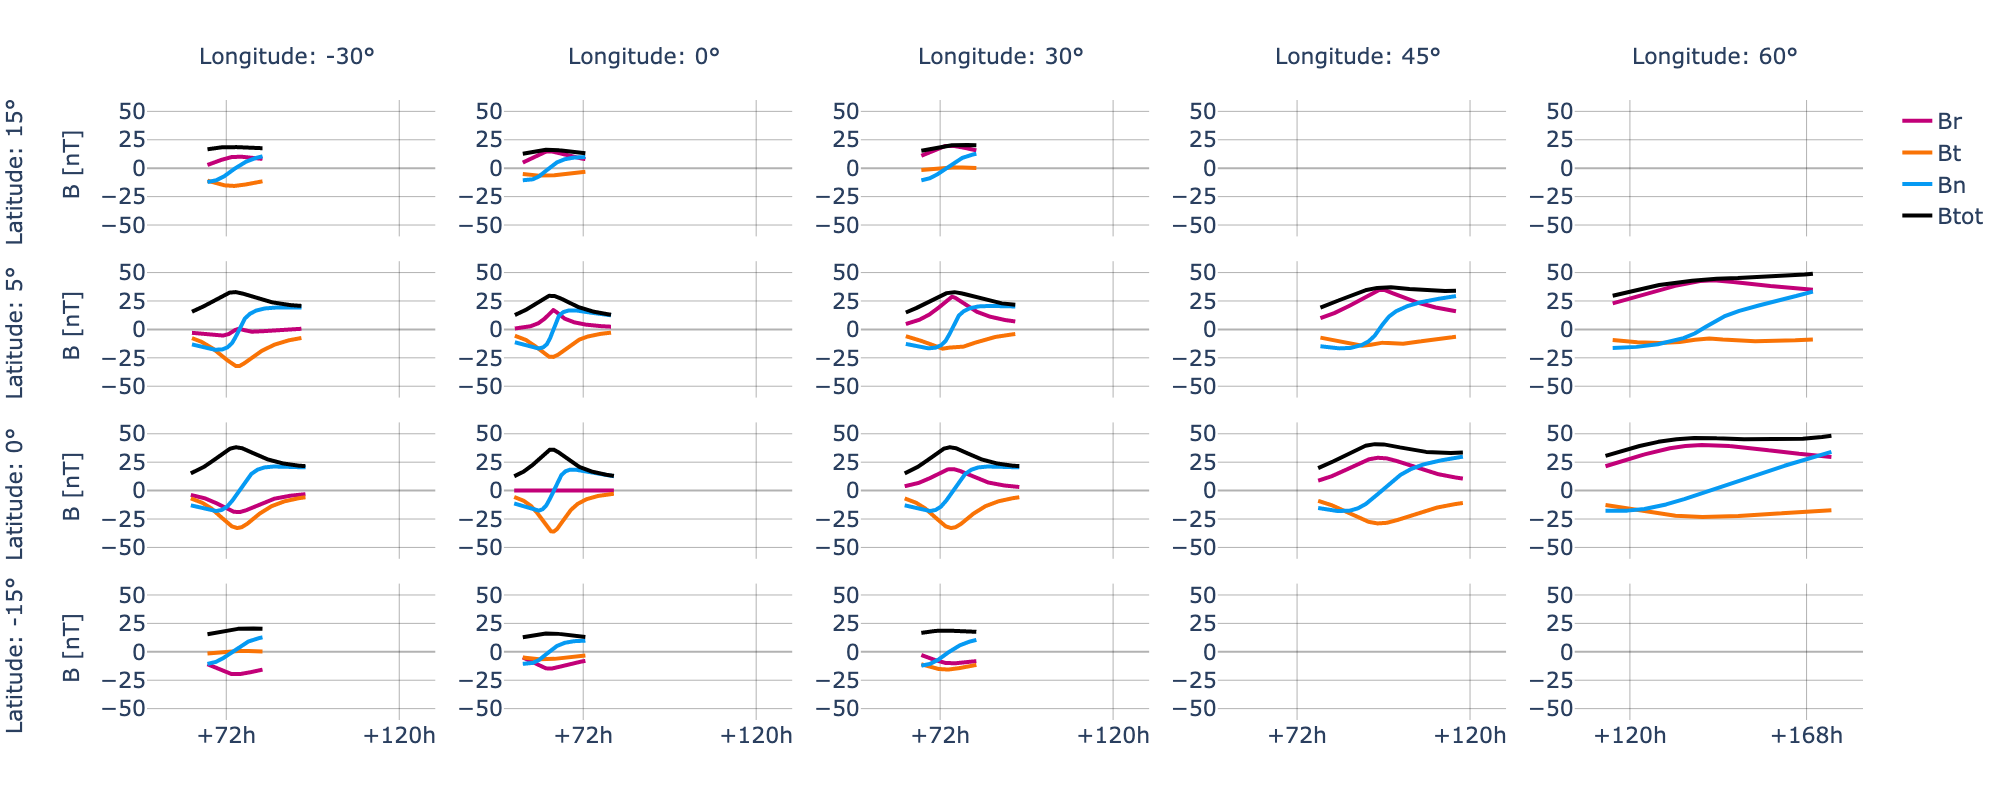

High Inclination!
righthanded: ENW
{'ensemble_size': 1, 'iparams': {'cme_longitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_latitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_inclination': {'distribution': 'fixed', 'default_value': 270.0}, 'cme_diameter_1au': {'distribution': 'fixed', 'default_value': 0.3}, 'cme_aspect_ratio': {'distribution': 'fixed', 'default_value': 2.0}, 'cme_launch_radius': {'distribution': 'fixed', 'default_value': 20.0}, 'cme_launch_velocity': {'distribution': 'fixed', 'default_value': 600.0}, 't_factor': {'distribution': 'fixed', 'default_value': 50.0}, 'cme_expansion_rate': {'distribution': 'fixed', 'default_value': 1.14}, 'magnetic_decay_rate': {'distribution': 'fixed', 'default_value': 1.64}, 'magnetic_field_strength_1au': {'distribution': 'fixed', 'default_value': 25.0}, 'background_drag': {'distribution': 'fixed', 'default_value': 1.0}, 'background_velocity': {'distribution': 'fixed', 'default_value': 500.0}}}
WNE_high


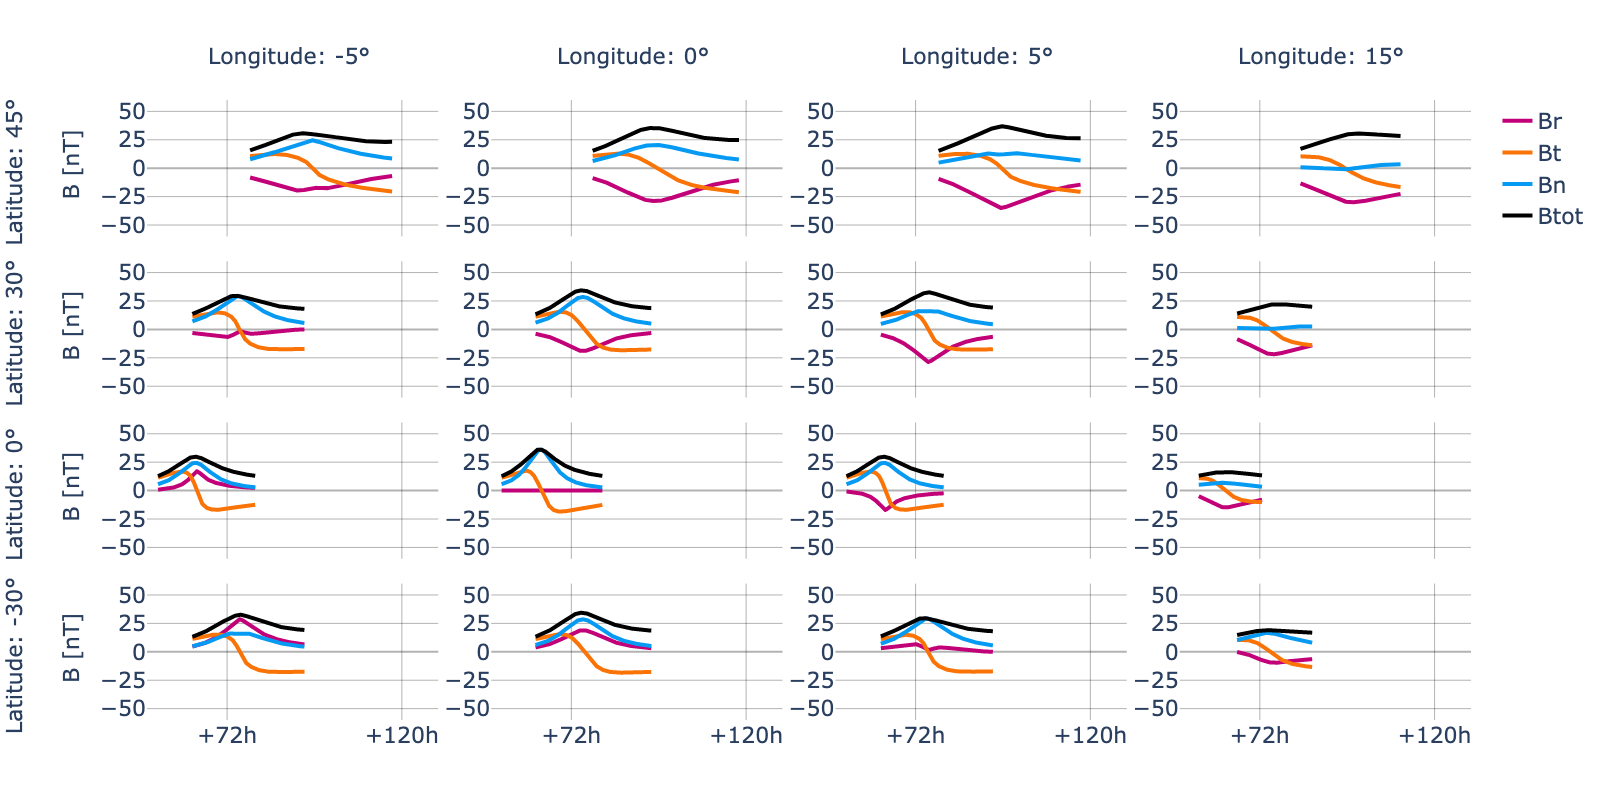

{'ensemble_size': 1, 'iparams': {'cme_longitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_latitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_inclination': {'distribution': 'fixed', 'default_value': 90.0}, 'cme_diameter_1au': {'distribution': 'fixed', 'default_value': 0.3}, 'cme_aspect_ratio': {'distribution': 'fixed', 'default_value': 2.0}, 'cme_launch_radius': {'distribution': 'fixed', 'default_value': 20.0}, 'cme_launch_velocity': {'distribution': 'fixed', 'default_value': 600.0}, 't_factor': {'distribution': 'fixed', 'default_value': 50.0}, 'cme_expansion_rate': {'distribution': 'fixed', 'default_value': 1.14}, 'magnetic_decay_rate': {'distribution': 'fixed', 'default_value': 1.64}, 'magnetic_field_strength_1au': {'distribution': 'fixed', 'default_value': 25.0}, 'background_drag': {'distribution': 'fixed', 'default_value': 1.0}, 'background_velocity': {'distribution': 'fixed', 'default_value': 500.0}}}
ESW_high


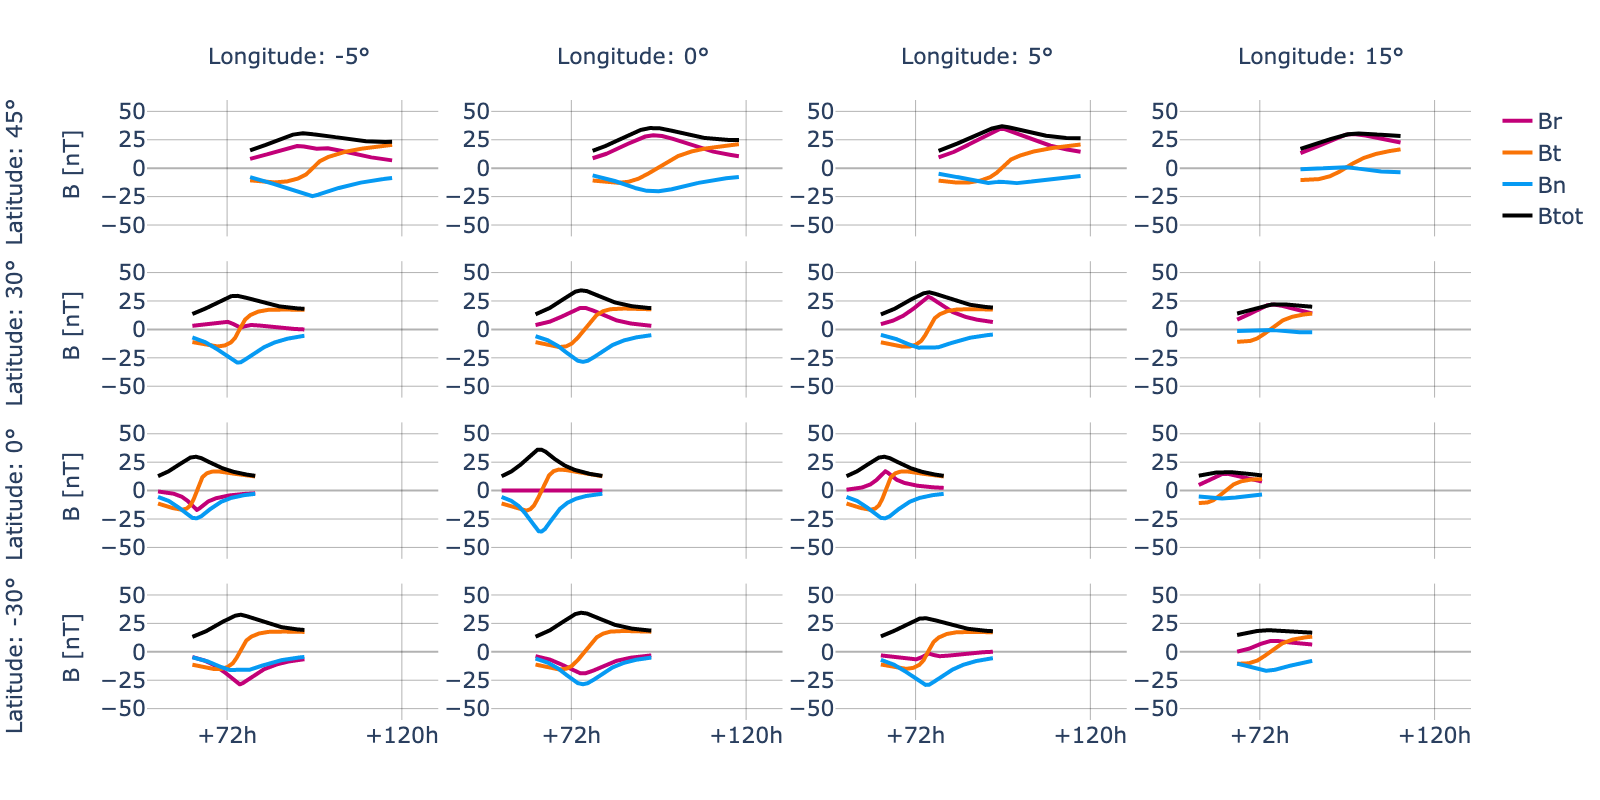

{'ensemble_size': 1, 'iparams': {'cme_longitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_latitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_inclination': {'distribution': 'fixed', 'default_value': 270.0}, 'cme_diameter_1au': {'distribution': 'fixed', 'default_value': 0.3}, 'cme_aspect_ratio': {'distribution': 'fixed', 'default_value': 2.0}, 'cme_launch_radius': {'distribution': 'fixed', 'default_value': 20.0}, 'cme_launch_velocity': {'distribution': 'fixed', 'default_value': 600.0}, 't_factor': {'distribution': 'fixed', 'default_value': -50.0}, 'cme_expansion_rate': {'distribution': 'fixed', 'default_value': 1.14}, 'magnetic_decay_rate': {'distribution': 'fixed', 'default_value': 1.64}, 'magnetic_field_strength_1au': {'distribution': 'fixed', 'default_value': 25.0}, 'background_drag': {'distribution': 'fixed', 'default_value': 1.0}, 'background_velocity': {'distribution': 'fixed', 'default_value': 500.0}}}
ENW_high


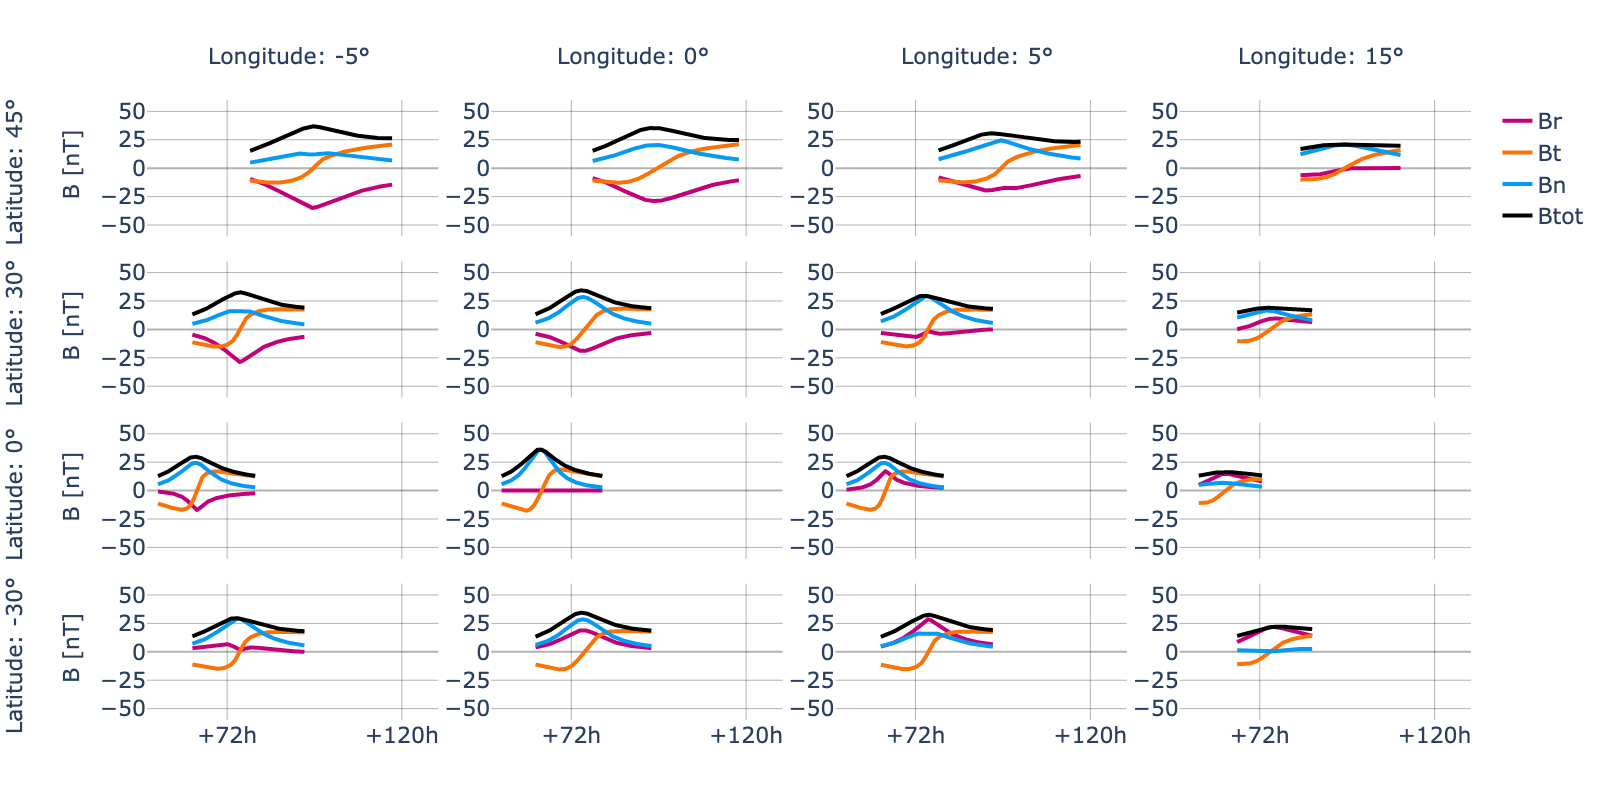

{'ensemble_size': 1, 'iparams': {'cme_longitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_latitude': {'distribution': 'fixed', 'default_value': 0.0}, 'cme_inclination': {'distribution': 'fixed', 'default_value': 90.0}, 'cme_diameter_1au': {'distribution': 'fixed', 'default_value': 0.3}, 'cme_aspect_ratio': {'distribution': 'fixed', 'default_value': 2.0}, 'cme_launch_radius': {'distribution': 'fixed', 'default_value': 20.0}, 'cme_launch_velocity': {'distribution': 'fixed', 'default_value': 600.0}, 't_factor': {'distribution': 'fixed', 'default_value': -50.0}, 'cme_expansion_rate': {'distribution': 'fixed', 'default_value': 1.14}, 'magnetic_decay_rate': {'distribution': 'fixed', 'default_value': 1.64}, 'magnetic_field_strength_1au': {'distribution': 'fixed', 'default_value': 25.0}, 'background_drag': {'distribution': 'fixed', 'default_value': 1.0}, 'background_velocity': {'distribution': 'fixed', 'default_value': 500.0}}}
WSE_high


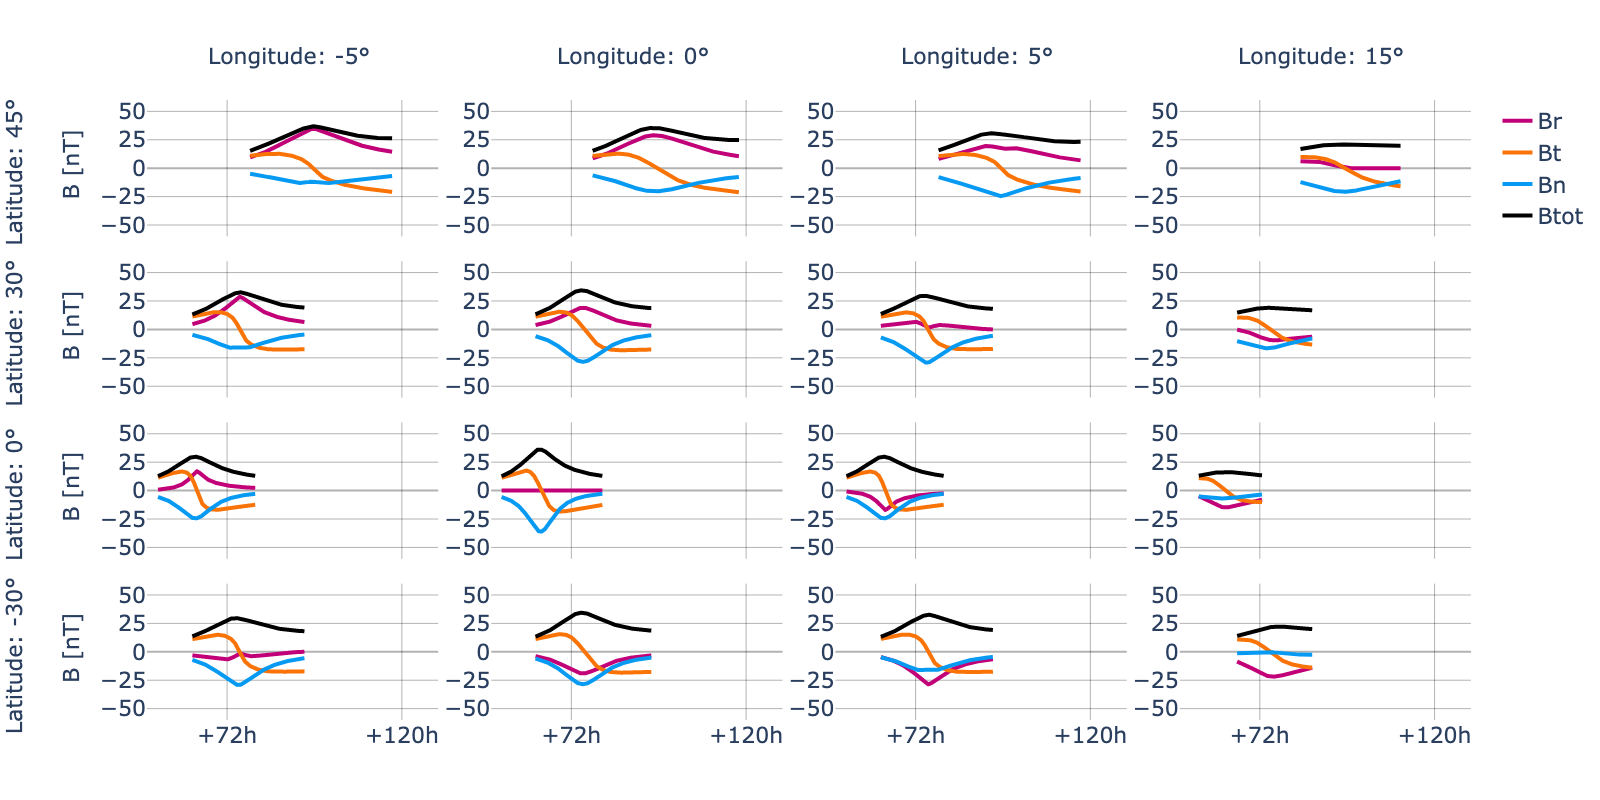

In [5]:
iparams = get_iparams_live(*modelstatevars1)
iparamslist, inccheck = ropechecker(iparams)

fluxtypeslow = ['SWN_low','NES_low', 'NWS_low','SEN_low']

fluxtypeshigh = ['WNE_high','ESW_high', 'ENW_high','WSE_high']

for i, namedir in enumerate(fluxtypeslow):

    
    iparams = iparamslist[i]

    print(iparams)
    print(namedir)

    t_launch = datetime.datetime(2012,12,21,6)
    model_obj = coreweb.ToroidalModel(t_launch, **iparams) # model gets initialized
    model_obj.generator()  
    checkanimany = check_animation(None, 
                                None,
                                plottheme, 
                                graphstore, 
                                reference_frame, 
                                rinput, lonput, latput, 
                                currenttimeslider, 
                                eventinfo, launchlabel, plot_options, spacecraftoptions, bodyoptions,  insitu, positions, view_legend_insitu, camera.copy(), posstore, *modelstatevars1)

    signaturecheckfull(lats, lons, model_obj, rinput, 'low_inc_low_twist_' + nameadd + namedir, checkanimany, graphstore, t_launch)



############# HIGH INC LOW TWIST

##### model parameters

modelstatevars1 = [0., # Longitude
                  0., # Latitude
                  90., # Inclination
                  0.3, # Diameter 1 AU 
                  2., # Aspect Ratio
                  20., # Launch Radius
                  600., # Launch Velocity
                  1.14, # Expansion Rate
                  1.00, # Background Drag
                  500., # Background Velocity
                  secondfield, # T_Factor
                  1.64, # Magnetic Decay Rate
                  25., # Magnetic Field Strength 1 AU
                  ]

iparams = get_iparams_live(*modelstatevars1)
iparamslist, inccheck = ropechecker(iparams)


checkanim = check_animation(None, 
                            None,
                            plottheme, 
                            graphstore, 
                            reference_frame, 
                            rinput, lonput, latput, 
                            currenttimeslider, 
                            eventinfo, launchlabel, plot_options, spacecraftoptions, bodyoptions,  insitu, positions, view_legend_insitu, camera.copy(), posstore, *modelstatevars1)



lons = [-15, 0, 5, 15]

lats = [45, 30 , 0, -30]

namecount = 0

for j, lon in enumerate(lons):
    for k,lat in enumerate(lats):
        x,y,z = sphere2cart(float(rinput), np.deg2rad(-float(lat)+90), np.deg2rad(float(lon)))

        checkanim.add_trace(
            go.Scatter3d(
                x=[x], y=[y], z=[z],
                mode='markers', 
                marker=dict(size=4, 
                            symbol=synshapes[j],
                            color=syncolors[k]),
                name="SYN_"+str(namecount),
                legendgroup = '1',
                showlegend=True,
            ), row=1, col=1)
        
        namecount += 1

for i, namedir in enumerate(fluxtypeshigh):

    
    iparams = iparamslist[i]

    print(iparams)
    print(namedir)

    t_launch = datetime.datetime(2012,12,21,6)
    model_obj = coreweb.ToroidalModel(t_launch, **iparams) # model gets initialized
    model_obj.generator()  
    checkanimany = check_animation(None, 
                                None,
                                plottheme, 
                                graphstore, 
                                reference_frame, 
                                rinput, lonput, latput, 
                                currenttimeslider, 
                                eventinfo, launchlabel, plot_options, spacecraftoptions, bodyoptions,  insitu, positions, view_legend_insitu, camera.copy(), posstore, *modelstatevars1)

    signaturecheckfull(lats, lons, model_obj, rinput, 'high_inc_low_twist_' + nameadd + namedir, checkanimany, graphstore, t_launch)




#########   LOW INC HIGH TWIST

##### model parameters

modelstatevars1 = [0., # Longitude
                  0., # Latitude
                  0., # Inclination
                  0.3, # Diameter 1 AU 
                  2., # Aspect Ratio
                  20., # Launch Radius
                  600., # Launch Velocity
                  1.14, # Expansion Rate
                  1.00, # Background Drag
                  500., # Background Velocity
                  firstfield, # T_Factor
                  1.64, # Magnetic Decay Rate
                  25., # Magnetic Field Strength 1 AU
                  ]

iparams = get_iparams_live(*modelstatevars1)
iparamslist, inccheck = ropechecker(iparams)

fluxtypeslow = ['SWN_low','NES_low', 'NWS_low','SEN_low']

fluxtypeshigh = ['WNE_high','ESW_high', 'ENW_high','WSE_high']

checkanim = check_animation(None, 
                            None,
                            plottheme, 
                            graphstore, 
                            reference_frame, 
                            rinput, lonput, latput, 
                            currenttimeslider, 
                            eventinfo, launchlabel, plot_options, spacecraftoptions, bodyoptions,  insitu, positions, view_legend_insitu, camera.copy(), posstore, *modelstatevars1)


lons = [-30, 0 , 30, 45, 60]

lats = [15, 5, 0, -15]

namecount = 0

for j, lon in enumerate(lons):
    for k,lat in enumerate(lats):
        x,y,z = sphere2cart(float(rinput), np.deg2rad(-float(lat)+90), np.deg2rad(float(lon)))

        checkanim.add_trace(
            go.Scatter3d(
                x=[x], y=[y], z=[z],
                mode='markers', 
                marker=dict(size=4, 
                            symbol=synshapes[j],
                            color=syncolors[k]),
                name="SYN_"+str(namecount),
                legendgroup = '1',
                showlegend=True,
            ), row=1, col=1)
        
        namecount += 1

for i, namedir in enumerate(fluxtypeslow):

    
    iparams = iparamslist[i]

    print(iparams)
    print(namedir)

    t_launch = datetime.datetime(2012,12,21,6)
    model_obj = coreweb.ToroidalModel(t_launch, **iparams) # model gets initialized
    model_obj.generator()  
    checkanimany = check_animation(None, 
                                None,
                                plottheme, 
                                graphstore, 
                                reference_frame, 
                                rinput, lonput, latput, 
                                currenttimeslider, 
                                eventinfo, launchlabel, plot_options, spacecraftoptions, bodyoptions,  insitu, positions, view_legend_insitu, camera.copy(), posstore, *modelstatevars1)

    signaturecheckfull(lats, lons, model_obj, rinput, 'low_inc_high_twist_' + nameadd + namedir, checkanimany, graphstore, t_launch)



############# HIGH INC HIGH TWIST

##### model parameters

modelstatevars1 = [0., # Longitude
                  0., # Latitude
                  90., # Inclination
                  0.3, # Diameter 1 AU 
                  2., # Aspect Ratio
                  20., # Launch Radius
                  600., # Launch Velocity
                  1.14, # Expansion Rate
                  1.00, # Background Drag
                  500., # Background Velocity
                  firstfield, # T_Factor
                  1.64, # Magnetic Decay Rate
                  25., # Magnetic Field Strength 1 AU
                  ]

iparams = get_iparams_live(*modelstatevars1)
iparamslist, inccheck = ropechecker(iparams)


checkanim = check_animation(None, 
                            None,
                            plottheme, 
                            graphstore, 
                            reference_frame, 
                            rinput, lonput, latput, 
                            currenttimeslider, 
                            eventinfo, launchlabel, plot_options, spacecraftoptions, bodyoptions,  insitu, positions, view_legend_insitu, camera.copy(), posstore, *modelstatevars1)



lons = [-5, 0, 5, 15]

lats = [45, 30 , 0, -30]

namecount = 0

for j, lon in enumerate(lons):
    for k,lat in enumerate(lats):
        x,y,z = sphere2cart(float(rinput), np.deg2rad(-float(lat)+90), np.deg2rad(float(lon)))

        checkanim.add_trace(
            go.Scatter3d(
                x=[x], y=[y], z=[z],
                mode='markers', 
                marker=dict(size=4, 
                            symbol=synshapes[j],
                            color=syncolors[k]),
                name="SYN_"+str(namecount),
                legendgroup = '1',
                showlegend=True,
            ), row=1, col=1)
        
        namecount += 1

for i, namedir in enumerate(fluxtypeshigh):

    
    iparams = iparamslist[i]

    print(iparams)
    print(namedir)

    t_launch = datetime.datetime(2012,12,21,6)
    model_obj = coreweb.ToroidalModel(t_launch, **iparams) # model gets initialized
    model_obj.generator()  
    checkanimany = check_animation(None, 
                                None,
                                plottheme, 
                                graphstore, 
                                reference_frame, 
                                rinput, lonput, latput, 
                                currenttimeslider, 
                                eventinfo, launchlabel, plot_options, spacecraftoptions, bodyoptions,  insitu, positions, view_legend_insitu, camera.copy(), posstore, *modelstatevars1)

    signaturecheckfull(lats, lons, model_obj, rinput, 'high_inc_high_twist_' + nameadd  + namedir, checkanimany, graphstore, t_launch)